# Euphoria Project: Classify Islands by Happiness
Made by Matteo Bruni, Federico Romano Gargarella, and Matteo Rapisarda

## Context
In the virtual world of **Euphoria**, an expansive digital archipelago, each island offers unique experiences and environments to its inhabitants. This project aims to explore and understand the characteristics that contribute to the happiness of island residents. By segmenting islands based on happiness levels, we can help similar travelers find their ideal destinations within Euphoria.

### Goals
- Identify key factors influencing the happiness levels on different islands.
- Segment islands to create traveler profiles, matching visitors to islands with similar features and happiness scores.
- Explore geographic, environmental, and amenity-based patterns to understand how these elements correlate with happiness and loyalty.

#### **Type of Problem**: **Clustering**

This is a **clustering problem** because the goal is to uncover meaningful groups of islands based on their happiness levels and related features. By testing different models and validating the clusters, we can identify distinct island segments for better traveler experiences.

### **Testing Different Models**

#### **1. KMeans Clustering**
   - Algorithm:
     - Partition data into `k` clusters.
     - Minimize intra-cluster variance (points are closer to their centroid).
   - Pros:
     - Works well for numeric data.
     - Easy to implement.
   - Cons:
     - Requires predefining `k`.
     - Sensitive to outliers.

#### **2. DBSCAN**
   - Algorithm:
     - Groups points based on density.
     - Identifies noise and finds arbitrarily shaped clusters.
   - Pros:
     - No need to specify the number of clusters.
     - Robust to noise and outliers.
   - Cons:
     - Struggles with varying densities in clusters.

#### **3. Hierarchical Clustering**
   - Algorithm:
     - Creates a tree-like structure (dendrogram) to show cluster relationships.
   - Pros:
     - Visual representation of cluster hierarchy.
   - Cons:
     - Computationally expensive for large datasets.

## EDA

This section is an **Exploratory Data Analysis (EDA)** module that examines a dataset's structure, quality, and distributions. It includes:

1. **Basic Inspection**: Displays dataset info, duplicate rows, and summary statistics.
2. **Missing Data Analysis**: Identifies and visualizes missing values using `missingno`.
3. **Categorical Analysis**: Explores distributions of categorical columns with bar plots.
4. **Numeric Data Visualization**: Plots histograms with KDE, showing mean, median, and skewness for each numeric column.

### Setting Up and Exploring Basic Info

In [90]:
import pandas as pd
import time

start_time = time.time()

pd.set_option('display.max_colwidth', None)  # Allow full column width display
pd.set_option('display.width', 1000)         # Set a larger width for the entire display

# Load the dataset to inspect its structure and content
euphoria_data = pd.read_csv("euphoria.csv")

# Display basic information and the first few rows to understand the dataset
print("Basic Info:")
print(euphoria_data.info())

print("\nFirst 5 Rows:")
print(euphoria_data.head())

# Check for duplicates
duplicates = euphoria_data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")

print("\nSummary Statistics:")
print(euphoria_data.describe(include='all'))

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   referral_friends         89572 non-null  float64
 1   water_sources            89536 non-null  float64
 2   shelters                 89382 non-null  float64
 3   fauna_friendly           35163 non-null  object 
 4   island_size              89578 non-null  float64
 5   creation_time            89462 non-null  float64
 6   region                   89306 non-null  object 
 7   happiness_metric         89566 non-null  object 
 8   features                 75035 non-null  object 
 9   happiness_index          89455 non-null  float64
 10  loyalty_score            89546 non-null  float64
 11  total_refunds_requested  89705 non-null  float64
 12  trade_goods              89673 non-null  object 
 13  x_coordinate             89491 non-null  float64
 14  avg_time_i

#### Summary of Results

The dataset contains **99,492 rows** and **19 columns**, with a mix of **numerical (12)** and **categorical (7)** variables. Key findings include:

- **Missing Data**: Significant missing values are present in the dataset.

- **Numerical Columns (12)**: referral_friends, water_sources, shelters, island_size, creation_time, happiness_index, loyalty_score, total_refunds_requested, x_coordinate, avg_time_in_euphoria, y_coordinate, and island_id.

- **Numerical Data Insights**:
  - Variables like `happiness_index` and `island_size` exhibit high variability and potential outliers.
  - Some numerical variables behave categorically, such as `referral_friends` and `water_sources`.

- **Categorical Columns (7)**: fauna_friendly, region, happiness_metric, features, trade_goods, entry_fee, and nearest_city.

- **Categorical Data Insights**:
  - `region` has 51 unique values, with **'TX'** being the most frequent.
  - The `features` column has 9404 unique combinations, requiring parsing for analysis.

- **Duplicate Rows**: None detected, simplifying preprocessing.

### Exploring Null Values


Missing Data Summary:
                         Missing Values  Percentage (%)
fauna_friendly                    64329       64.657460
features                          24457       24.581876
nearest_city                      10239       10.291280
region                            10186       10.238009
entry_fee                         10126       10.177703
shelters                          10110       10.161621
y_coordinate                      10099       10.150565
happiness_index                   10037       10.088248
creation_time                     10030       10.081213
x_coordinate                      10001       10.052064
island_id                          9972       10.022916
avg_time_in_euphoria               9966       10.016886
water_sources                      9956       10.006835
loyalty_score                      9946        9.996784
happiness_metric                   9926        9.976682
referral_friends                   9920        9.970651
island_size              

<Figure size 1200x600 with 0 Axes>

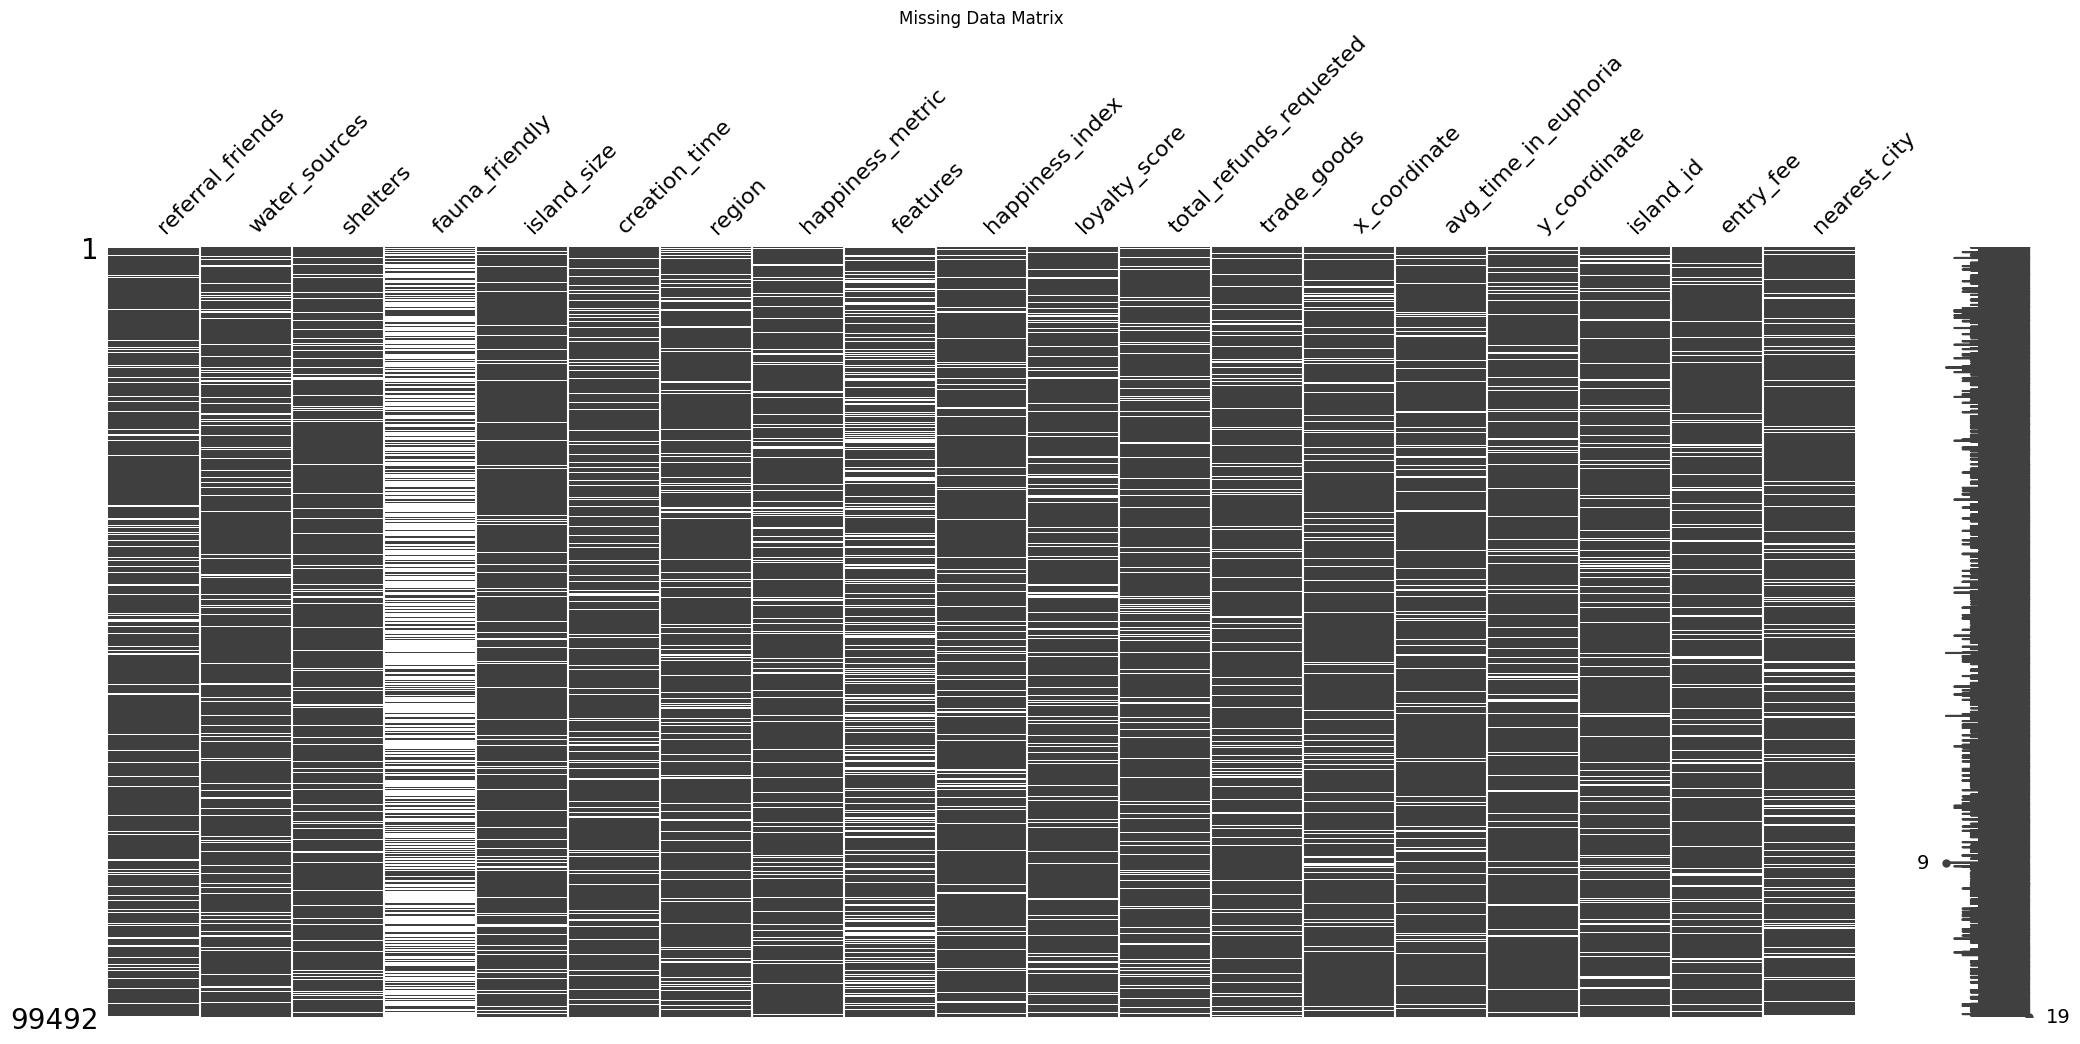

In [91]:
import matplotlib.pyplot as plt

# Calculate missing values and percentages
missing_values_count = euphoria_data.isnull().sum()
missing_percentage = (missing_values_count / len(euphoria_data)) * 100

# Combine into a dataframe
missing_data_summary = pd.DataFrame({
    "Missing Values": missing_values_count,
    "Percentage (%)": missing_percentage
}).sort_values(by="Missing Values", ascending=False)

# Display the dataframe
print("\nMissing Data Summary:")
print(missing_data_summary)

# Visualize missing data
import missingno as msno

# Missing data matrix
plt.figure(figsize=(12, 6))
msno.matrix(euphoria_data)
plt.title("Missing Data Matrix")
plt.show()

#### Correlation Heatmap of Missing Data

<Figure size 1200x600 with 0 Axes>

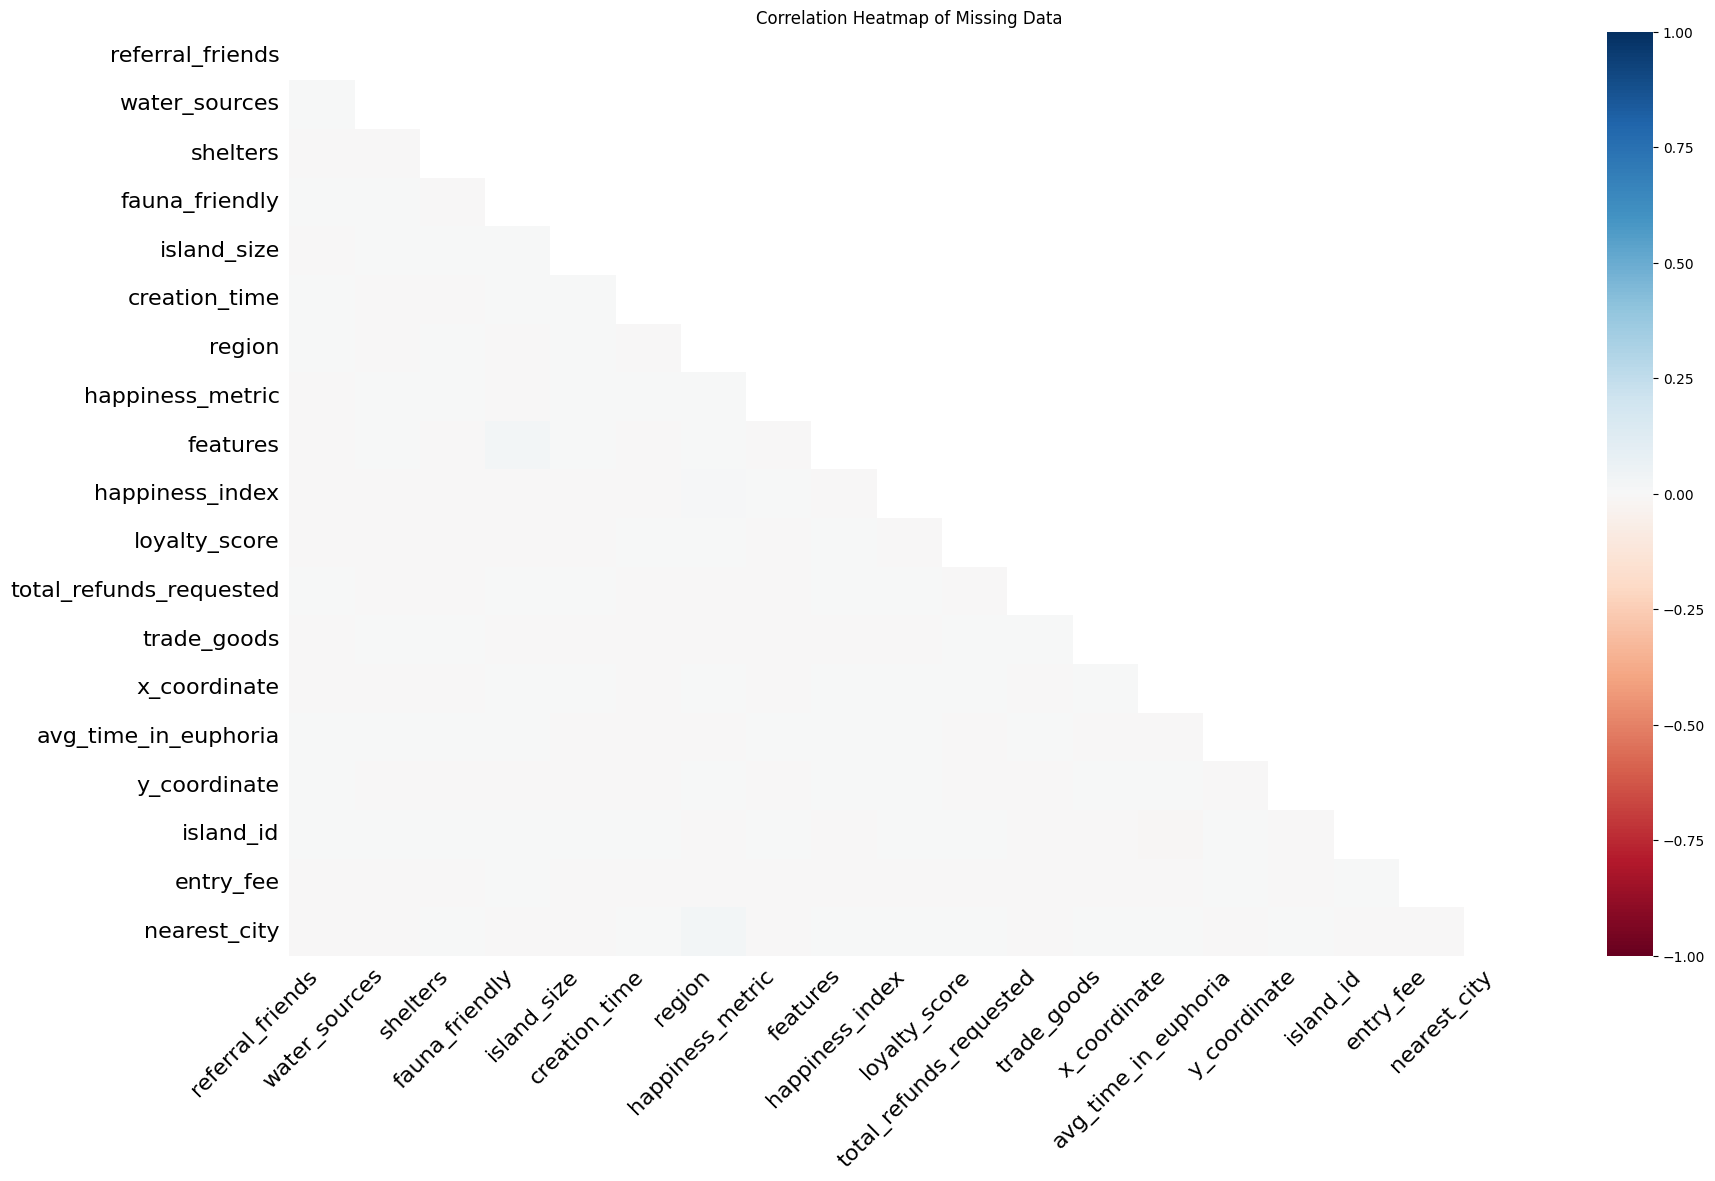

In [92]:
plt.figure(figsize=(12, 6))
msno.heatmap(euphoria_data)
plt.title("Correlation Heatmap of Missing Data")
plt.show()

#### Summary of Missing Data

- **Extent of Missingness**:
  - Significant missing data across multiple columns.
  - Highest missing values: `fauna_friendly` (**64.66%**), followed by `features` (**24.58%**) and others (~**10%** missing for most).

- **Visual Insights**:
  - **Missing Data Matrix**: Highlights columns like `fauna_friendly` with consistent missingness and scattered patterns in others.
  - **Correlation Heatmap**: No strong correlations between missing values, indicating independent missingness.

- **Implications**:
  - High-missing columns (e.g., `fauna_friendly`) may need exclusion.
  - Numerical columns (~10% missing) can be imputed with **mean** or **median** based on distribution.
  - Categorical data missingness can use the most frequent value or "Unknown." 

### Exploring Categorical Variables

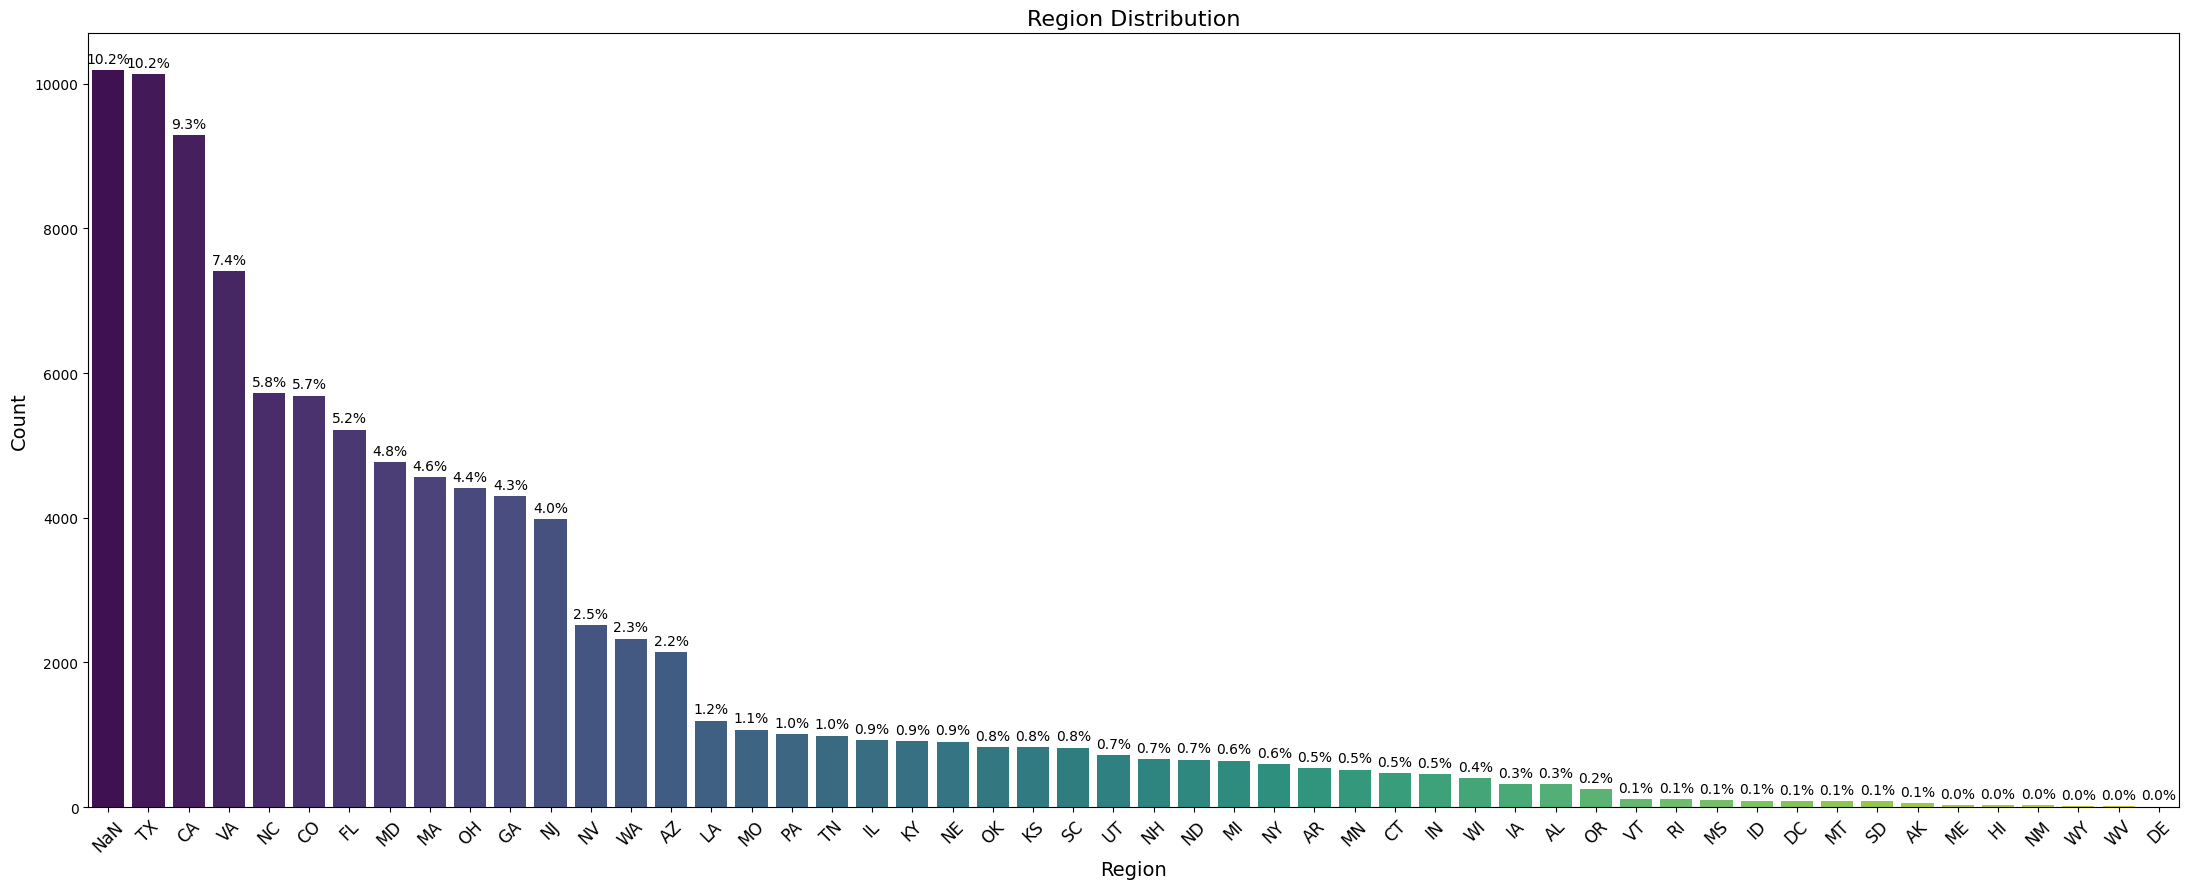

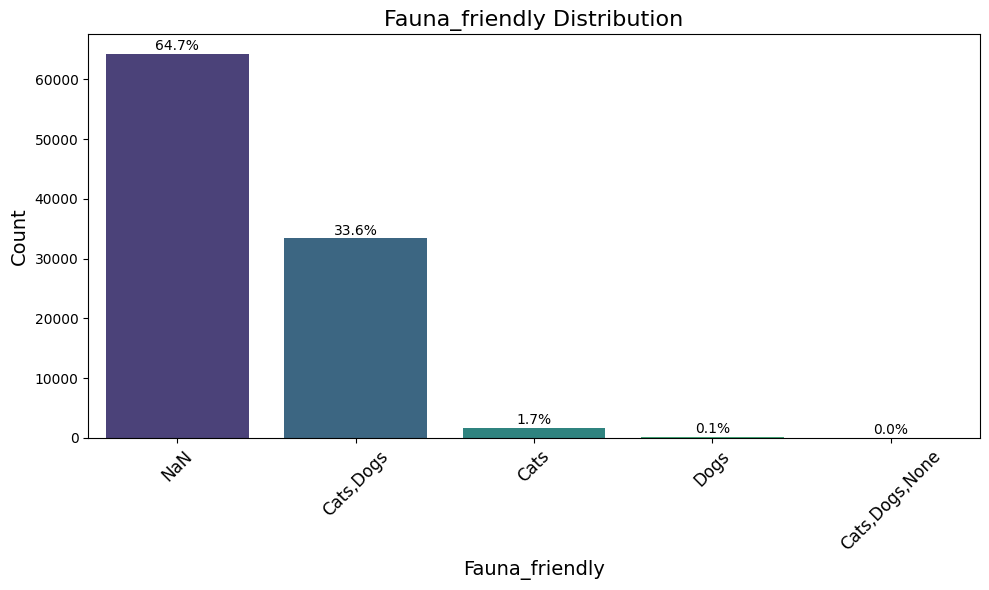

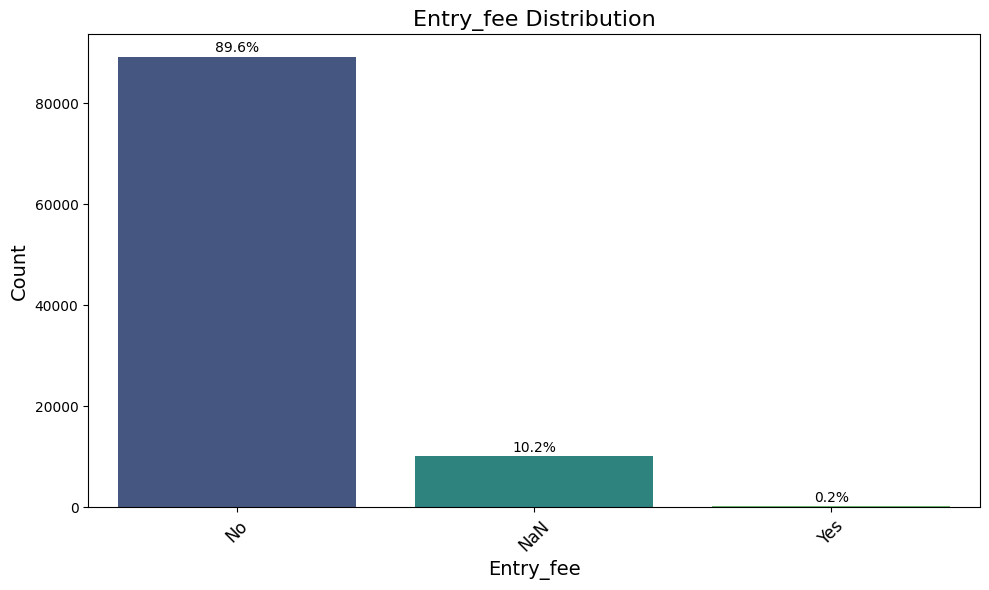

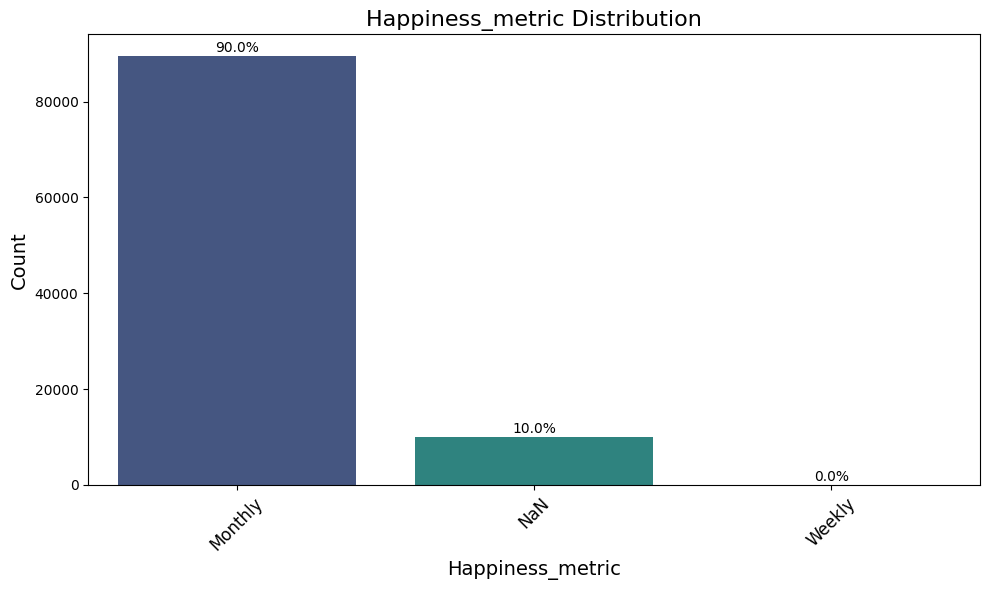

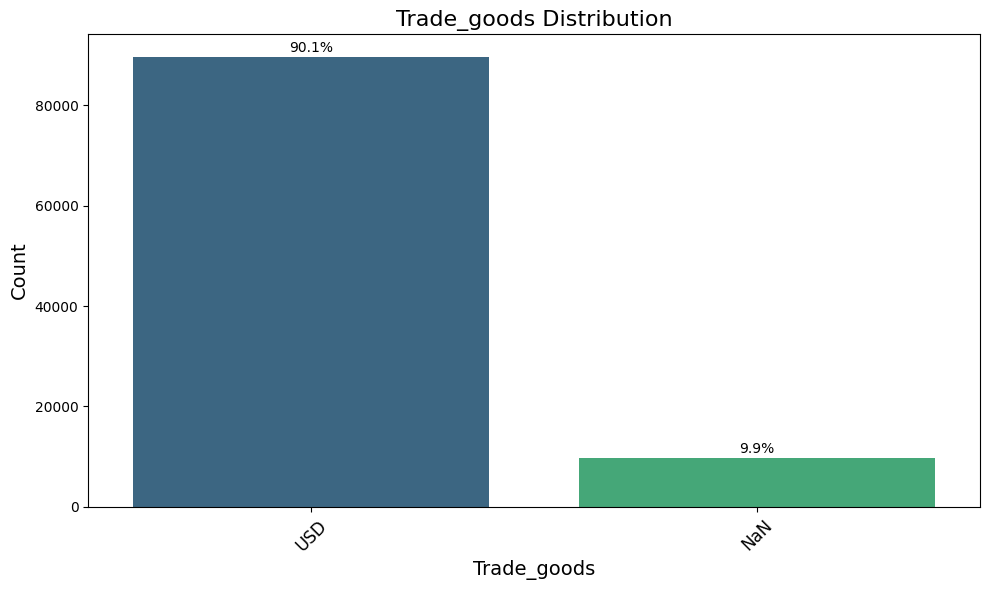

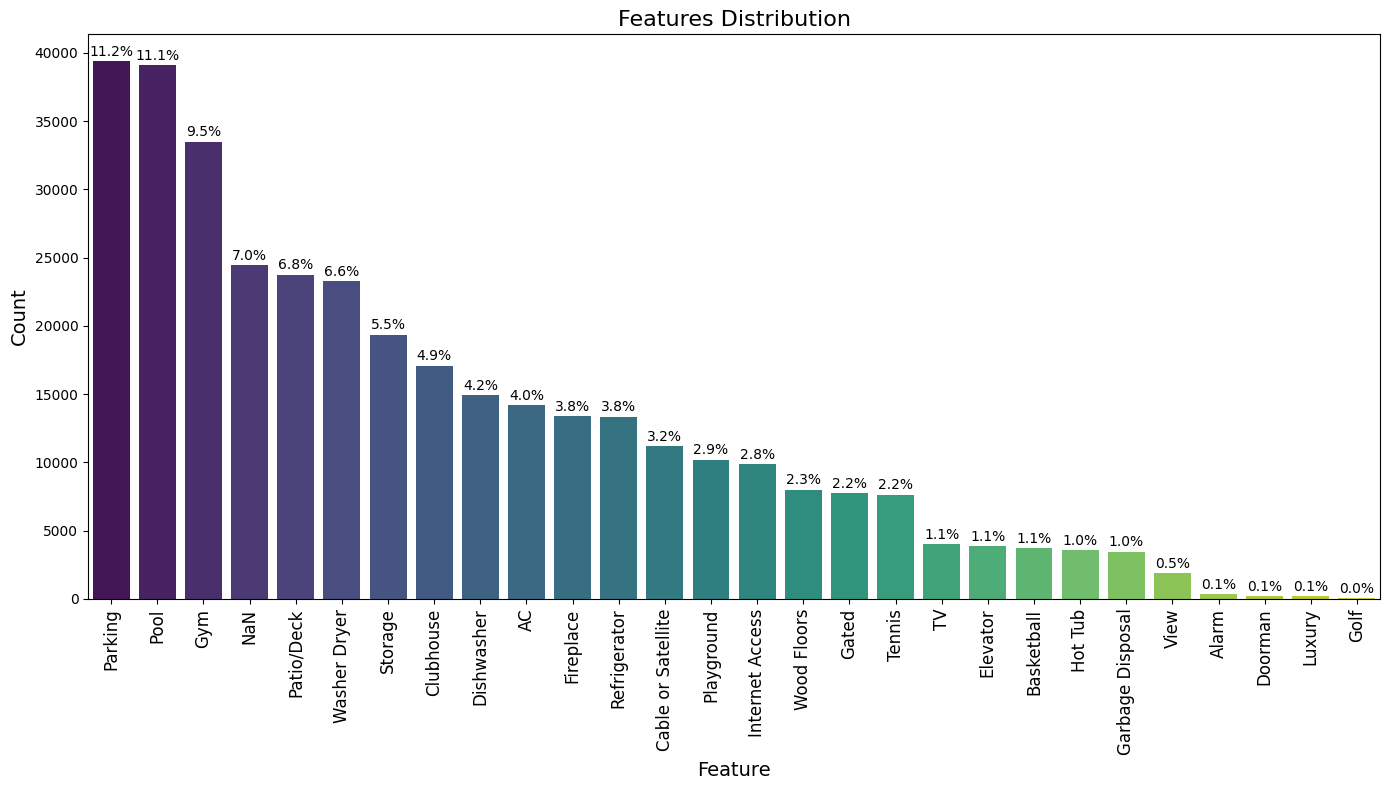

In [93]:
import seaborn as sns

# Function to plot categorical distribution
def plot_categorical_distribution(data, column, figsize=(10, 6), rotation=45):
    """
    Plots the distribution of a categorical column, including counts of 'None' (NaN) values.
    """
    # Include NaN counts as a separate category
    counts = data[column].fillna('NaN').value_counts()

    # Create the plot
    plt.figure(figsize=figsize)
    sns.barplot(x=counts.index, y=counts.values, hue= counts.index, palette="viridis")
    plt.xticks(rotation=rotation, fontsize=12)
    plt.title(f'{column.capitalize()} Distribution', fontsize=16)
    plt.xlabel(column.capitalize(), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    
    # Add percentage labels
    for i, v in enumerate(counts.values):
        plt.text(
            i, v + max(counts.values) * 0.01,  # Slightly offset for visibility
            f"{(v / counts.sum() * 100):.1f}%",
            ha='center', fontsize=10
        )
    
    plt.tight_layout()
    plt.show()

# Function to analyze features column (list or comma-separated values)
def plot_feature_distribution(data, column, figsize=(14, 8)):
    """
    Plots the distribution of items in a column containing lists or comma-separated values.
    Handles NaN values explicitly.
    """
    # Include NaN counts as a separate category
    features_series = data[column].fillna('NaN')

    # Split the feature strings into individual items, flatten the list
    features_split = features_series.str.split(',')
    features_flattened = [item.strip() for sublist in features_split for item in sublist]  # Trim whitespace

    # Count occurrences of each feature
    features_counts = pd.Series(features_flattened).value_counts()

    # Prepare the data for visualization
    features_df = pd.DataFrame(features_counts).reset_index()
    features_df.columns = ['Feature', 'Count']
    features_df['Percentage'] = (features_df['Count'] / features_df['Count'].sum()) * 100

    # Create the vertical barplot
    plt.figure(figsize=figsize)
    sns.barplot(x='Feature', y='Count', data=features_df, hue='Feature', palette='viridis')

    # Add percentages on top of the bars
    for index, row in features_df.iterrows():
        plt.text(
            index, row['Count'] + max(features_df['Count']) * 0.01,  # Offset based on maximum value
            f"{row['Percentage']:.1f}%",
            ha='center', fontsize=10
        )

    # Customize the plot
    plt.title('Features Distribution', fontsize=16)
    plt.xlabel('Feature', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=90, fontsize=12)
    plt.tight_layout()
    plt.show()

# Plot categorical distributions
categorical_columns = ['region', 'fauna_friendly', 'entry_fee', 'happiness_metric', 'trade_goods']
for col in categorical_columns:
    figsize = (22, 9) if col == 'region' else (10, 6)
    plot_categorical_distribution(euphoria_data, col, figsize)

# Plot the features column distribution
plot_feature_distribution(euphoria_data, 'features')


#### Summary of Categorical Variables Exploration

The charts reveal the following key insights:

1. **Missing Data**: Many attributes, such as region, fauna-friendly status, entry fees, and features, have significant missing values (NaN), impacting data completeness and analysis reliability.

2. **Dominant Categories**:
   - **Region**: TX and CA dominate, with most other states having much smaller representation.
   - **Fauna Friendly**: "Cats,Dogs" is the most common, but a majority of data is missing.
   - **Entry Fee**: Most entries have "No" entry fee, promoting accessibility.
   - **Happiness Metric**: "Monthly" is overwhelmingly common, with minimal weekly records.
   - **Trade Goods**: All trade occurs in "USD".
   - **Features**: Popular features include "Parking," "Pool," and "Gym," while niche features like "Luxury" and "Golf" are rare.

3. **Skewed Distributions**: Across multiple dimensions, a few categories dominate while others have low or negligible counts.

### Exploring Numerical Variables

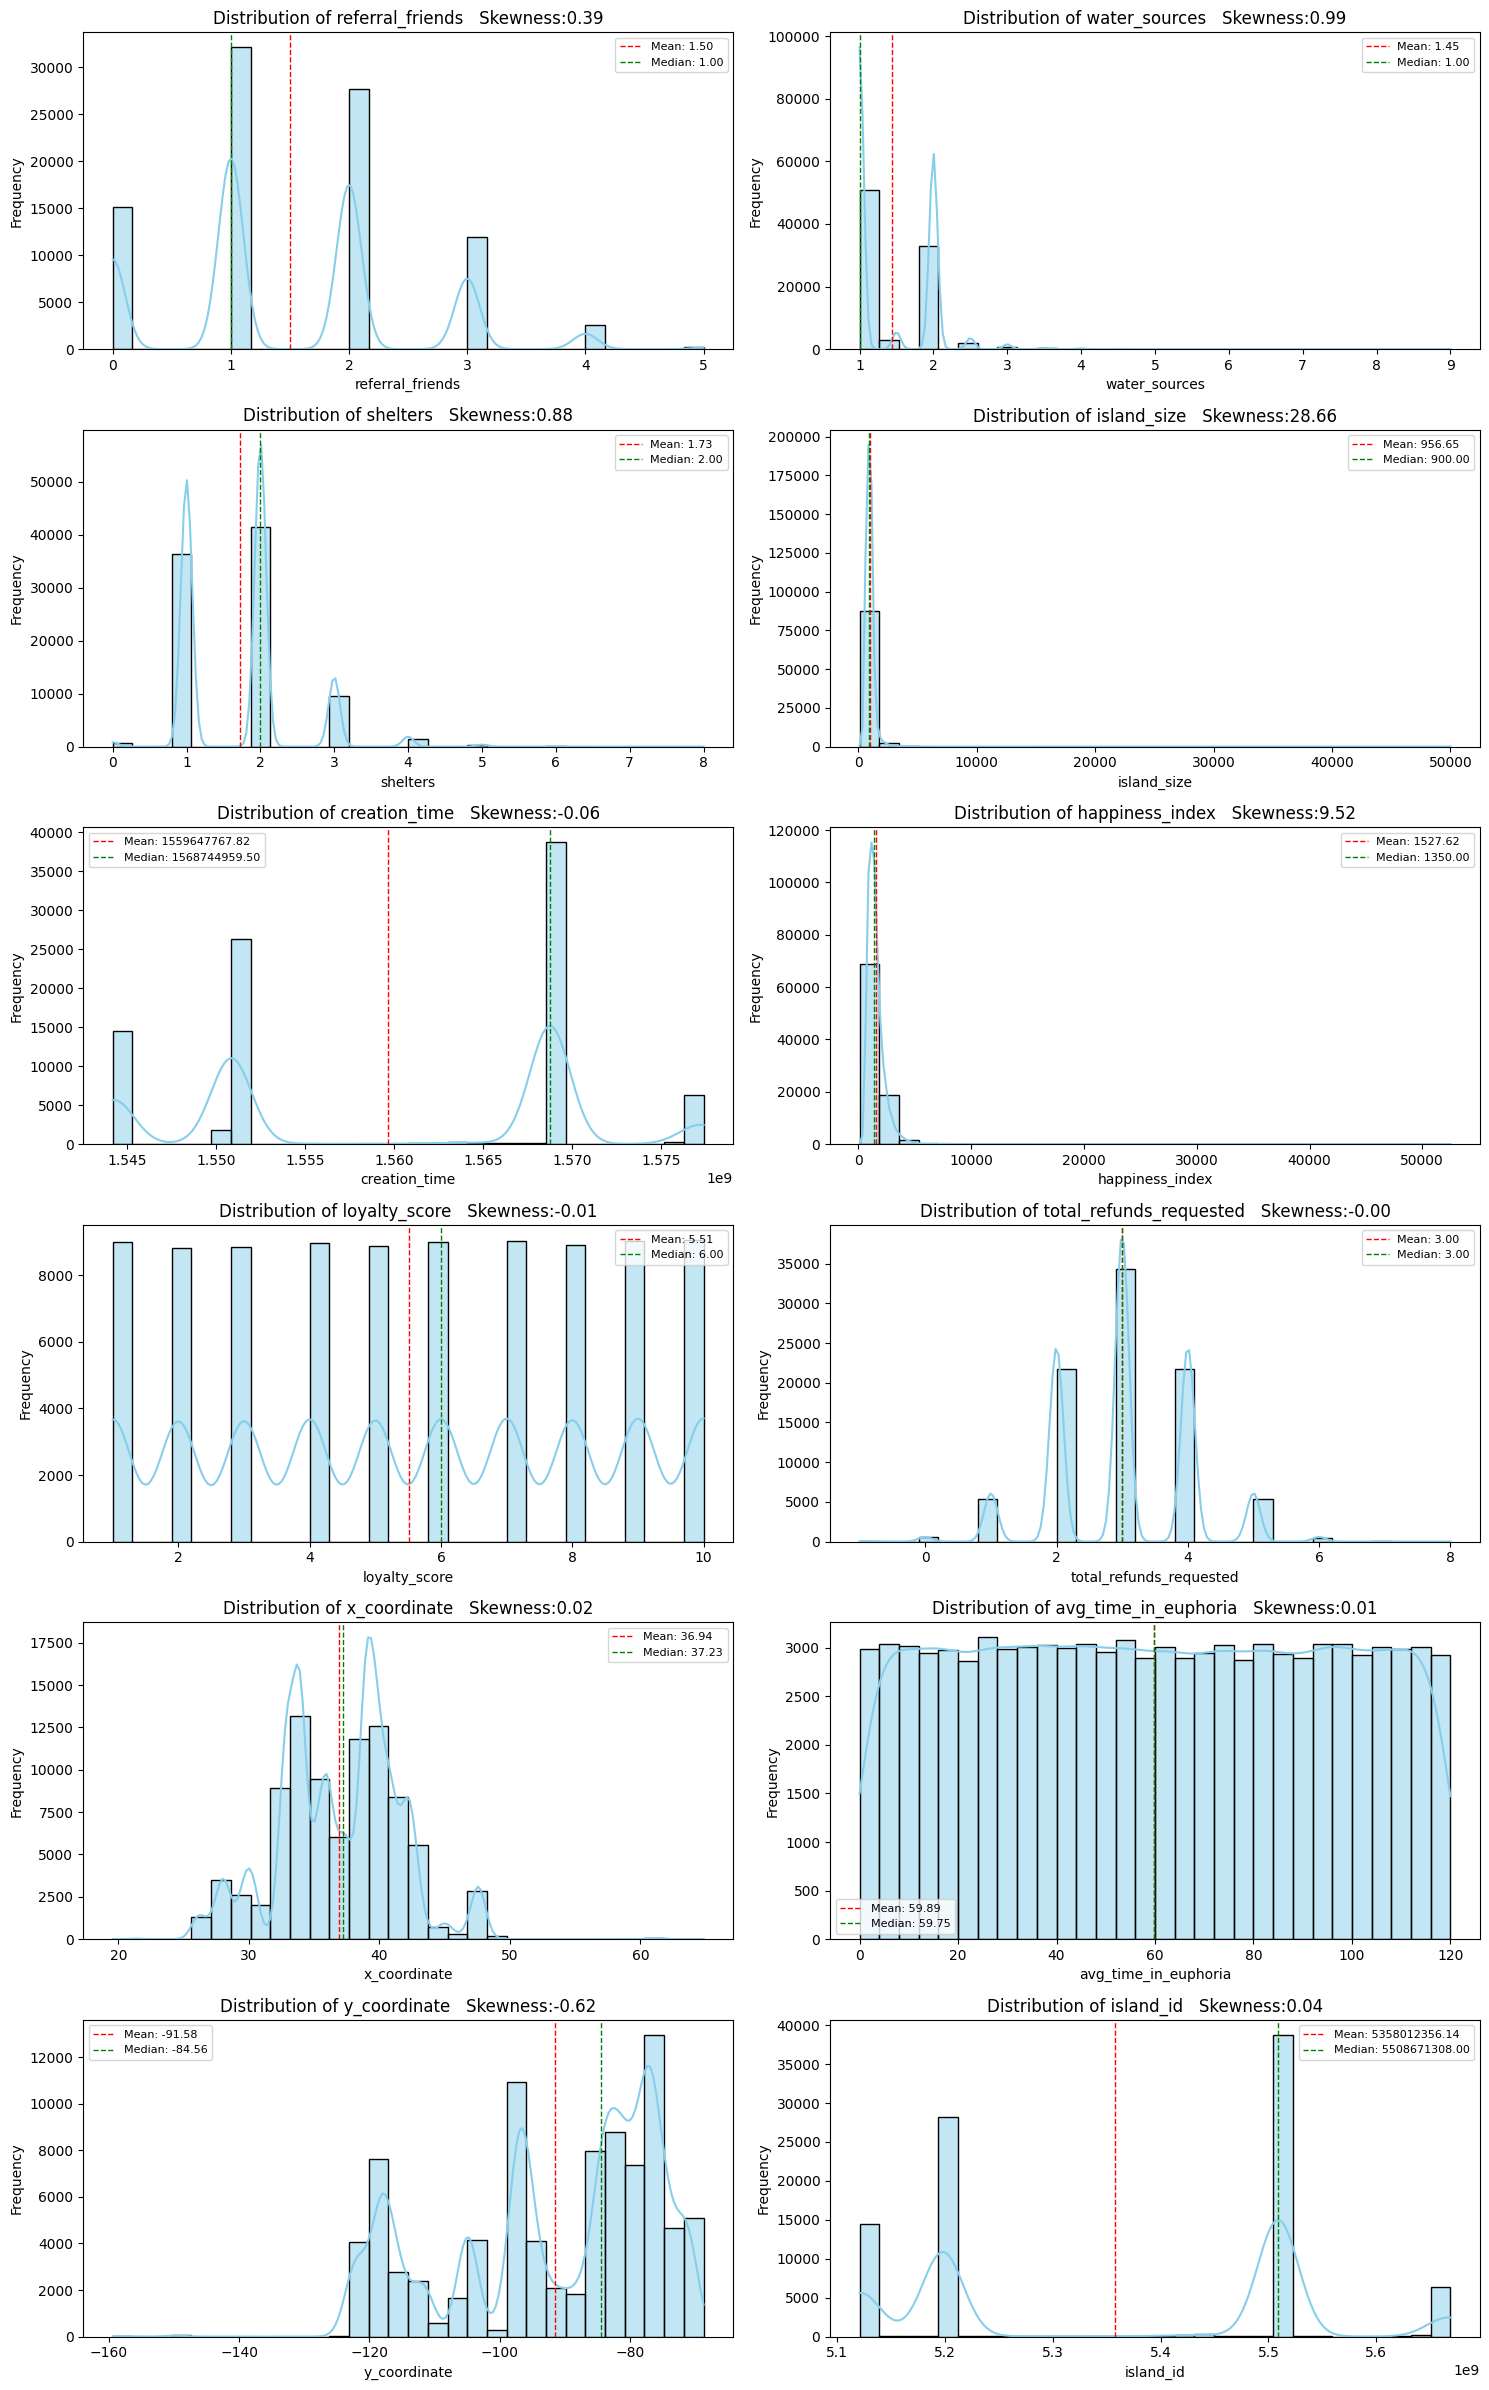

In [94]:
from scipy.stats import skew

def plot_numeric_distributions(data, numeric_columns, bins=30):
    """
    Plots the distributions of numeric columns with KDE, including skewness and summary stats.
    """
    # Calculate the grid size for subplots
    n_cols = 2
    n_rows = -(-len(numeric_columns) // n_cols)  # Ceiling division

    plt.figure(figsize=(15, n_rows * 4))  # Adjust figure height dynamically
    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(n_rows, n_cols, i)
        
        # Handle missing values
        col_data = data[col].dropna()
        
        # Add mean and median and skewness
        mean_val = col_data.mean()
        median_val = col_data.median()
        skewness = skew(col_data)
        
        # Plot histogram with KDE
        sns.histplot(col_data, kde=True, bins=bins, color="skyblue", edgecolor="black")
        
        # Add title and labels
        plt.title(f'Distribution of {col}   Skewness:{skewness:.2f}', fontsize=12)
        plt.xlabel(col, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)
        
        # Add mean and median as vertical lines
        plt.axvline(mean_val, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_val:.2f}')
        plt.axvline(median_val, color='green', linestyle='--', linewidth=1, label=f'Median: {median_val:.2f}')
        plt.legend(fontsize=8)

    plt.tight_layout()
    plt.show()

# List of numeric columns to explore
numeric_columns = euphoria_data.select_dtypes(include=['number']).columns.tolist()

# Call the function
plot_numeric_distributions(euphoria_data, numeric_columns)


#### Summary of Numerical Variables Exploration

The distributions reveal the following key points:

1. **Balanced Features**: Variables like "Creation Time," "Loyalty Score," and "Total Refunds Requested" are well-balanced with minimal skewness, requiring little preprocessing.

2. **Highly Skewed Features**: "Island Size" and "Happiness Index" exhibit extreme positive skewness, with outliers significantly impacting the mean. These require handling for better analysis.

3. **Moderately Skewed Features**: "Referral Friends," "Water Sources," and "Shelters" have mild positive skewness, indicating some concentration at lower values with tails extending upward.

4. **Uniform Distribution**: "Average Time in Euphoria" is uniformly distributed, suggesting equal representation across its range.

## Handling Outliers

This section focuses on **Outlier Handling** and is organized into three key parts:

1. **Outlier Detection**: Identifies outliers in numeric columns (excluding specific ones) using the Z-score method, ignoring missing values, and returns counts of outliers for each column. The Z-score method is used to handle outliers because it provides a standardized, efficient, and reliable way to identify extreme values based on their deviation from the mean. Allows easy thresholding, and preserves data integrity by capping outliers instead of removing them.

2. **Outlier Capping**: Caps extreme outliers by setting them to ±3 standard deviations from the mean while preserving missing values.

3. **Visualization**: Creates boxplots for numeric columns before and after capping to visualize distributions and compare the effects of outlier handling.


I am excluding **`x_coordinate`**, **`y_coordinate`**, and **`island_id`** from outlier handling because:

1. **Coordinates**:
   - **`x_coordinate`** and **`y_coordinate`** are spatial variables, and their "extreme" values may not necessarily indicate an issue. Instead, they might represent valid positions within a defined range or map area.
   - Applying Z-score-based outlier detection could incorrectly flag valid coordinates as outliers.

2. **Identifiers**:
   - **`island_id`** is a unique identifier for entities, not a numeric variable representing measurable data. It doesn’t require outlier handling since each value is distinct and doesn’t conform to statistical concepts like mean, standard deviation, or Z-scores.

### Detecting Outliers

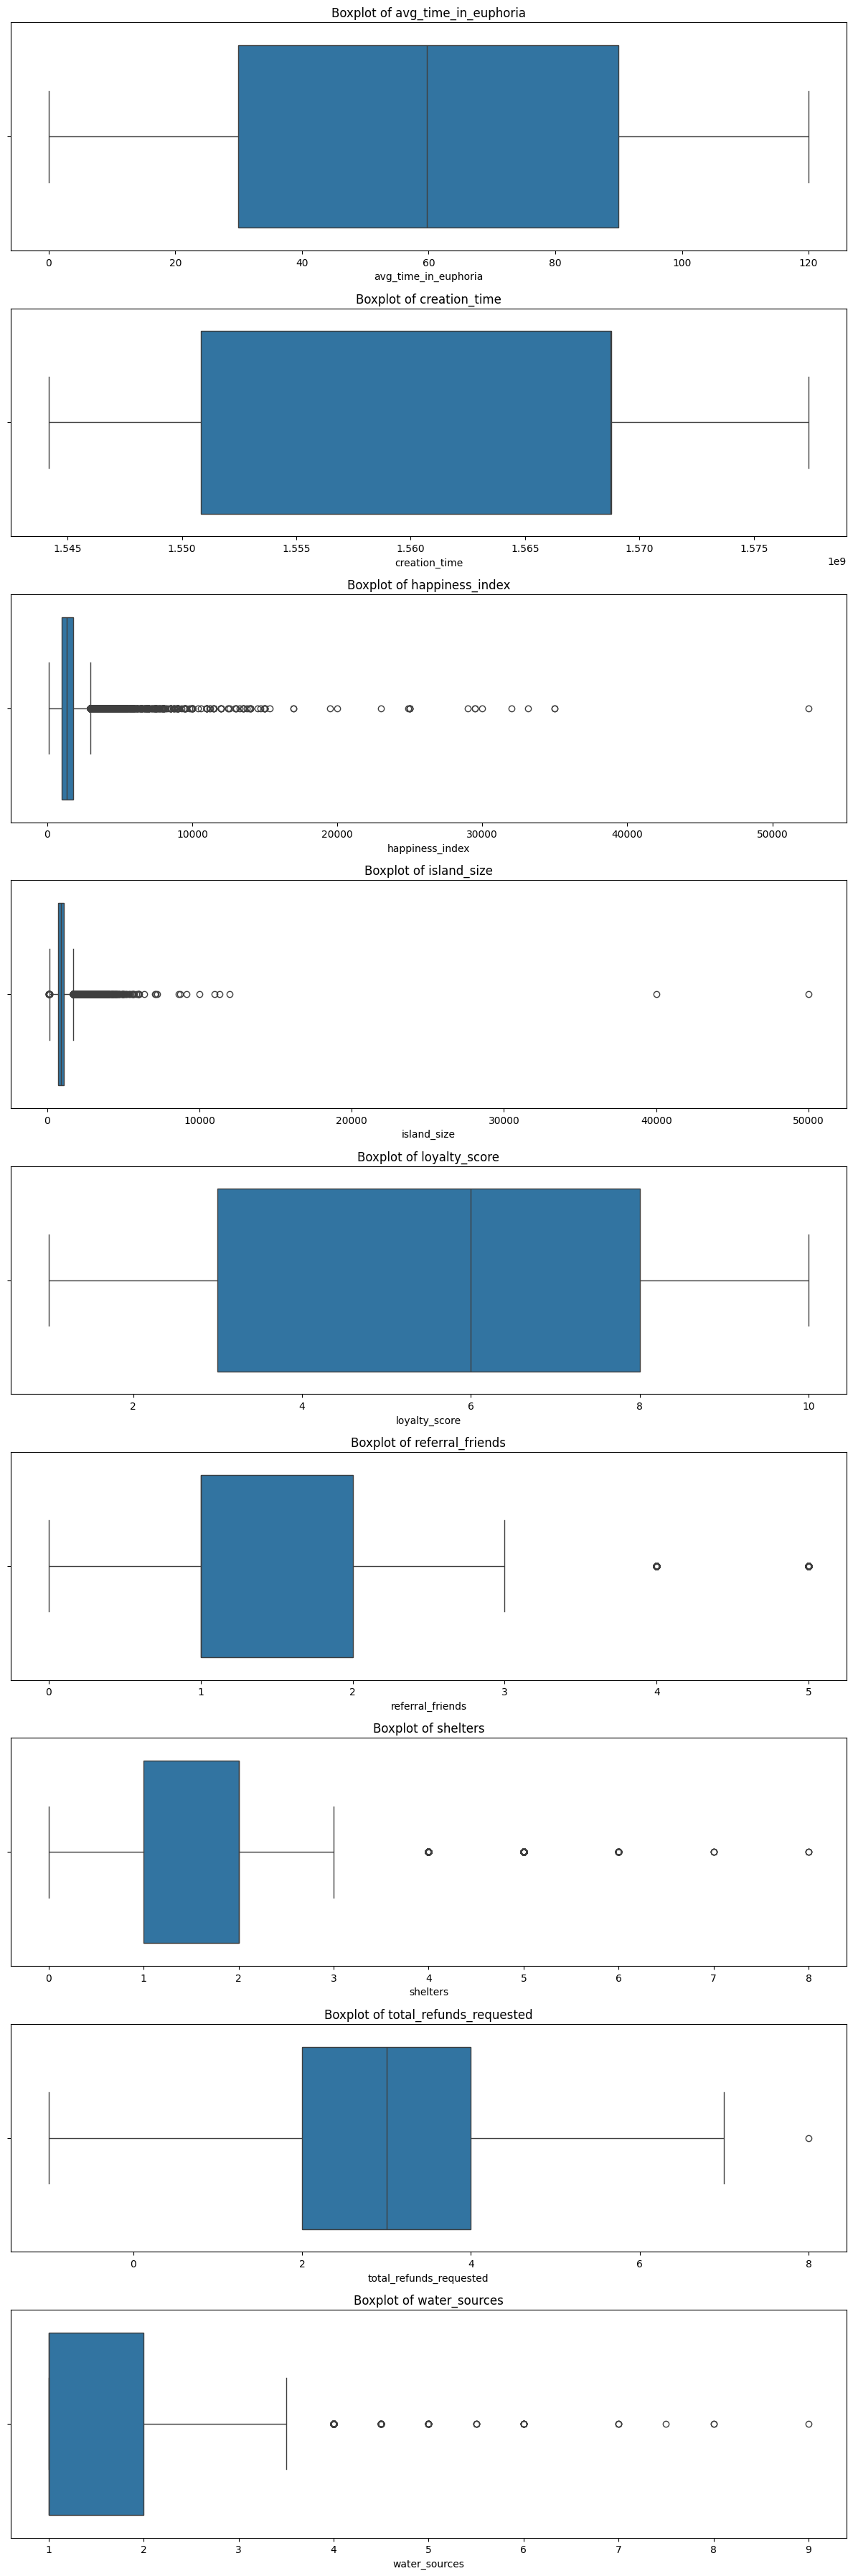

In [95]:
# Select all numeric columns, excluding 'x_coordinate', 'y_coordinate', and 'island_id'
exclude_columns = ['x_coordinate', 'y_coordinate', 'island_id']
numeric_columns = euphoria_data.select_dtypes(include=['number']).columns.difference(exclude_columns).tolist()

# Set the figure size
plt.figure(figsize=(12, len(numeric_columns) * 4))

# Create individual boxplots for each column
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(data=euphoria_data, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()  # Adjusts spacing between subplots

# Show the plots
plt.show()

#### Comment

The boxplots show the distributions and outliers for various numeric features:

1. **Avg_time_in_euphoria, Creation_time, Loyalty_score, and Total_refunds_requested**: These features are well-distributed with no significant outliers.

2. **Happiness_index and Island_size**: Both show a large number of extreme outliers, indicating highly skewed distributions.

3. **Referral_friends, Shelters, and Water_sources**: These features have moderate outliers but are generally well-distributed within their ranges.

### Z-Score Detection

In [96]:
from scipy.stats import zscore
import numpy as np

# Function to detect outliers using Z-score (without affecting missing values)
def detect_outliers_zscore(df, numeric_columns, threshold=3):
    """
    Detect outliers in each numeric column using the Z-score method.
    Returns a dictionary with column names as keys and outlier counts as values.
    """
    outlier_counts = {}
    for col in numeric_columns:
        # Compute Z-scores for the column, excluding missing values
        valid_data = df[col].dropna()
        z_scores = zscore(valid_data)
        
        # Count the number of outliers based on the Z-score threshold
        outlier_counts[col] = (abs(z_scores) > threshold).sum()
        
    return outlier_counts

# List of numeric columns (excluding unwanted columns like 'x_coordinate' and 'y_coordinate')
exclude_columns = ['x_coordinate', 'y_coordinate', 'island_id']
numeric_columns = euphoria_data.select_dtypes(include=['number']).columns.difference(exclude_columns).tolist()

# Detect outliers and get counts
outlier_counts_zscore = detect_outliers_zscore(euphoria_data, numeric_columns)

# Print outlier counts
print("Outlier counts using Z-score method:")
print(outlier_counts_zscore)

Outlier counts using Z-score method:
{'avg_time_in_euphoria': 0, 'creation_time': 0, 'happiness_index': 912, 'island_size': 947, 'loyalty_score': 0, 'referral_friends': 226, 'shelters': 1668, 'total_refunds_requested': 45, 'water_sources': 373}


### Z-Score Capping

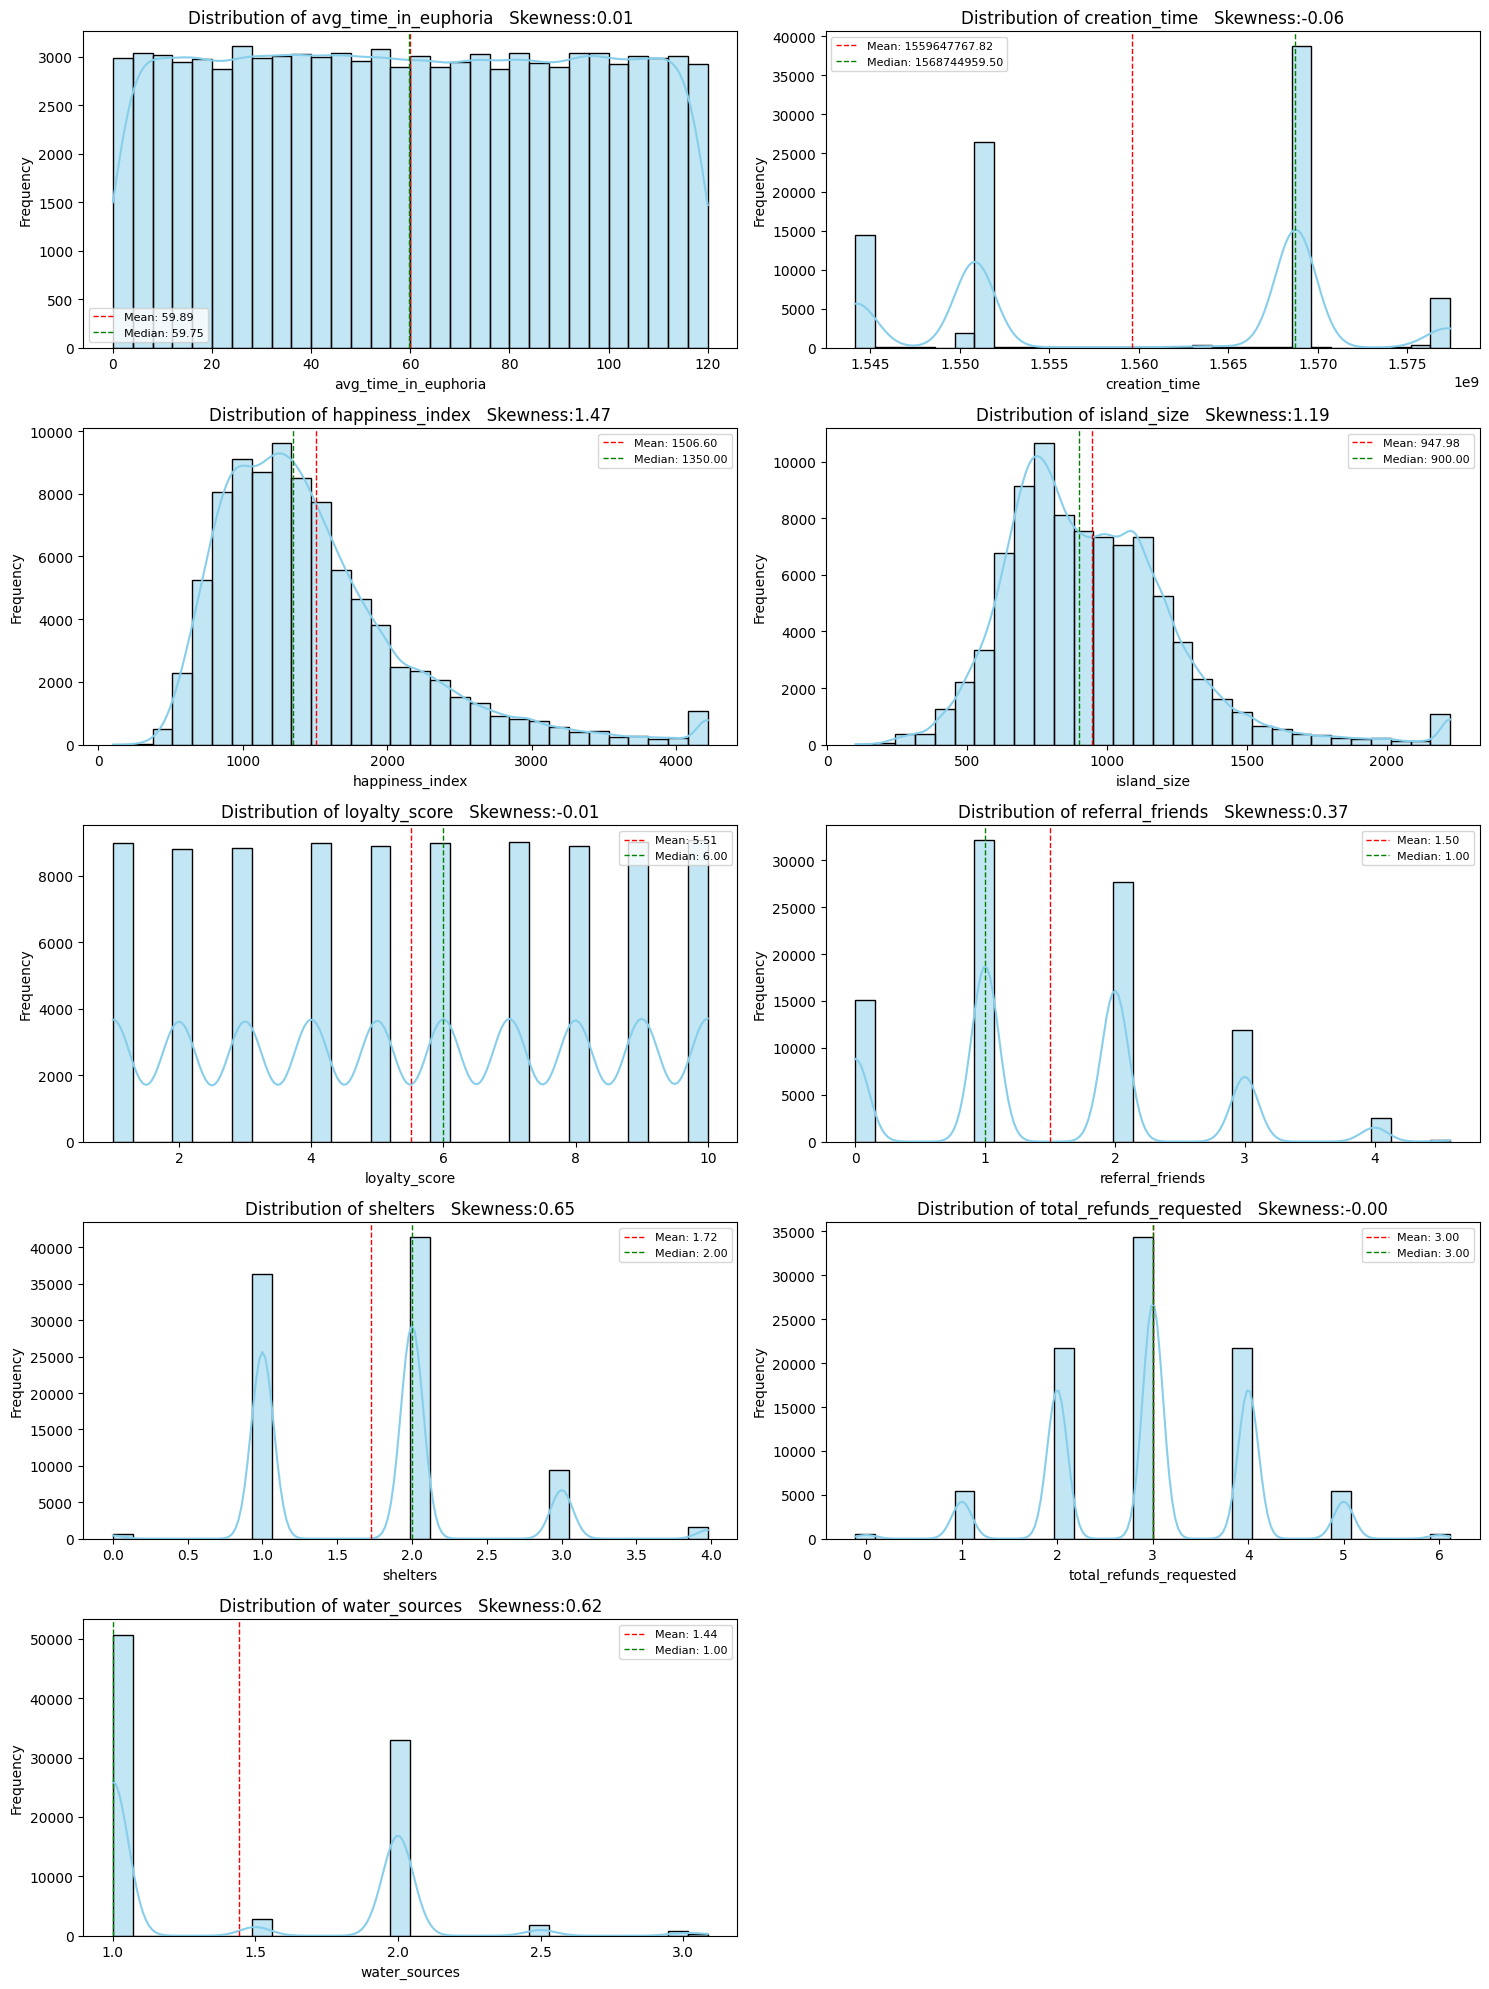

In [97]:
# Function to cap outliers using Z-score (without affecting missing values)
def cap_outliers_zscore(df, numeric_columns, threshold=3):
    """
    Cap outliers in each numeric column using the Z-score method.
    Outliers are capped at the threshold value without modifying missing values.
    """
    df_capped = df.copy()
    for col in numeric_columns:
        # Exclude missing values and compute Z-scores
        valid_data = df_capped[col].dropna()
        z_scores = zscore(valid_data)
        mean = valid_data.mean()
        std_dev = valid_data.std()
        
        # Calculate caps
        upper_cap = mean + threshold * std_dev
        lower_cap = mean - threshold * std_dev
        
        # Cap outliers without modifying NaN values
        df_capped.loc[valid_data.index, col] = np.where(
            valid_data > upper_cap, upper_cap,
            np.where(valid_data < lower_cap, lower_cap, valid_data)
        )
    return df_capped

# Cap outliers in the dataset (preserve missing values)
euphoria_data = cap_outliers_zscore(euphoria_data, numeric_columns)

# Plot numeric distributions after capping (optional, replace with your own plotting function)
plot_numeric_distributions(euphoria_data, numeric_columns)

### Plotting Boxplots After Handling Outliers

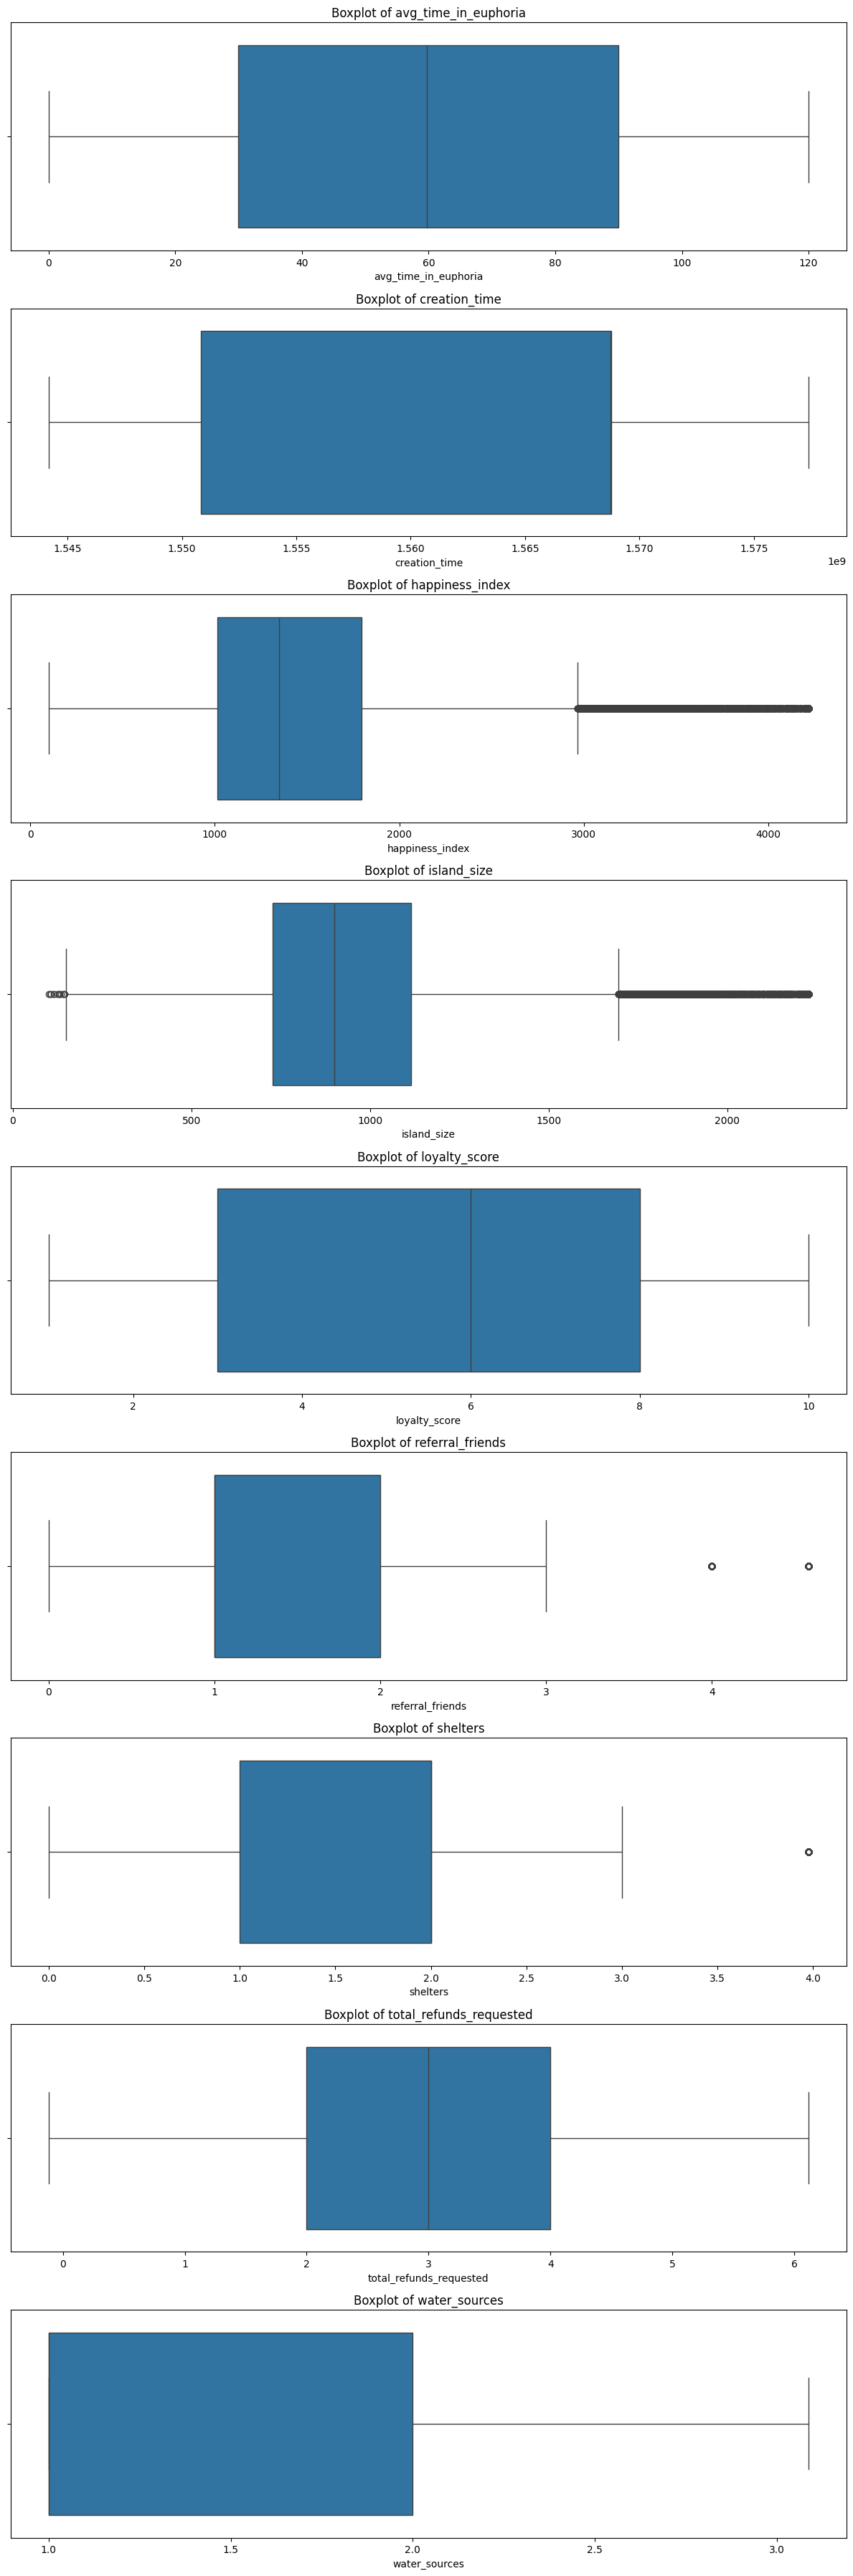

In [98]:
# Set the figure size
plt.figure(figsize=(12, len(numeric_columns) * 4))

# Create individual boxplots for each column
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(data=euphoria_data, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()  # Adjusts spacing between subplots

# Show the plots
plt.show()

### Comment on Outlier Handling Results

After capping outliers using Z-score, the following changes are evident compared to the data before capping:

1. **Reduced Outliers**: The boxplots show that extreme values have been effectively capped, particularly for variables like `happiness_index` and `island_size`, which previously had significant outliers beyond the whiskers.

2. **More Balanced Distributions**: While variables like `happiness_index` and `island_size` are still skewed, The tails have been significantly diminished, making the data more balanced and less influenced by extreme values.

3. **Minimal Impact on Uniform or Symmetrical Variables**: Features like `avg_time_in_euphoria`, `creation_time`, and `loyalty_score`, which were already well-distributed, remain unaffected. This shows that the Z-score method preserves valid data while addressing extreme values.

4. **Improved Data Consistency**: By capping outliers, the data becomes less volatile and more suitable for modeling or statistical analysis, as extreme anomalies no longer dominate metrics like mean and standard deviation.

**Conclusion:** Capping outliers using Z-scores has successfully reduced extreme values while maintaining the overall structure of the data. This ensures improved robustness for downstream analysis compared to the pre-capping state, where extreme values could have skewed insights or model performance.

## Handling Missing Values

This section handles missing values in two main categories:

1. **Categorical Variables**:
- Fills missing `region` values using geographic proximity (KDTree) and `nearest_city` mapping, removing rows with unresolved `region` values.
- Replaces missing values in `fauna_friendly` and `features` with `'None'` and in other categorical columns with `'Unknown'`.

2. **Numerical Variables**:
- Removes rows with missing `happiness_index`.
- Handles duplicates in `island_id` by removing duplicates and dropping the column, and ensures unique row indexing.
- Imputes missing values with:
    - **Median** for skewed variables (`island_size`).
    - **0** for coordinates (`x_coordinate`, `y_coordinate`).
    - **Mean** for other numeric columns.

### Handling Categorical Variables

#### Handling Missing `region` Value

In [99]:
from scipy.spatial import cKDTree

def fill_missing_region(df):
    """
    Fill missing values in the 'region' column using the region based on coordinates.
    """
    # Filter rows with and without missing regions
    df_with_region = df.dropna(subset=['region', 'x_coordinate', 'y_coordinate'])
    df_missing_region = df[df['region'].isna() & df[['x_coordinate', 'y_coordinate']].notnull().all(axis=1)]
    
    # Build KDTree for nearest neighbor search
    coords_with_region = df_with_region[['x_coordinate', 'y_coordinate']].to_numpy()
    tree = cKDTree(coords_with_region)
    
    # Fill missing regions
    missing_coords = df_missing_region[['x_coordinate', 'y_coordinate']].to_numpy()
    _, indices = tree.query(missing_coords, k=1)
    nearest_regions = df_with_region.iloc[indices]['region'].values
    
    # Update the missing regions in the original DataFrame
    df.loc[df['region'].isna() & df[['x_coordinate', 'y_coordinate']].notnull().all(axis=1), 'region'] = nearest_regions
    
    return df

def fill_remaining_region_with_city(df):
    """
    Fill remaining missing 'region' values using the 'nearest_city' column.
    """
    # Create a city-to-region mapping from rows where both are available
    city_to_region = df.dropna(subset=['nearest_city', 'region']).set_index('nearest_city')['region'].to_dict()
    
    # Fill missing regions using the nearest_city mapping
    df.loc[df['region'].isna() & df['nearest_city'].notna(), 'region'] = df['nearest_city'].map(city_to_region)
    
    return df

# Initial missing regions count
print(f"Missing regions before: {euphoria_data['region'].isna().sum()}")
print(f"Dataset shape before imputing region values: {euphoria_data.shape}")

# Step 1: Fill missing regions using KDTree (geographic proximity)
euphoria_data = fill_missing_region(euphoria_data)
print(f"\nRemaining missing regions after imputing with region coordinates: {euphoria_data['region'].isna().sum()}")

# Step 2: Fill remaining missing regions using the nearest_city column
euphoria_data = fill_remaining_region_with_city(euphoria_data)
print(f"\nRemaining missing regions after nearest_city mapping: {euphoria_data['region'].isna().sum()}")

# Step 3: Drop rows with missing regions
euphoria_data = euphoria_data.dropna(subset=['region'])
print(f"\nFinal dataset shape after dropping missing rows: {euphoria_data.shape}")

Missing regions before: 10186
Dataset shape before imputing region values: (99492, 19)

Remaining missing regions after imputing with region coordinates: 1957

Remaining missing regions after nearest_city mapping: 268

Final dataset shape after dropping missing rows: (99224, 19)


#### Handling the Remaining Categorical Variables

In [100]:
euphoria_data['fauna_friendly'] = euphoria_data['fauna_friendly'].replace('Cats,Dogs,None', 'Cats,Dogs')
categorical_columns = ['fauna_friendly', 'features', 'entry_fee', 'happiness_metric', 'trade_goods', 'nearest_city']

for col in categorical_columns:
    if col in ['fauna_friendly', 'features']:
        euphoria_data[col] = euphoria_data[col].fillna('None')
    else:
        euphoria_data[col] = euphoria_data[col].fillna('Unknown')

# Display the updated dataset
print("\nUpdated Dataset:")
print(euphoria_data.head(10))


Updated Dataset:
   referral_friends  water_sources  shelters fauna_friendly  island_size  creation_time region happiness_metric                                                                                                                                               features  happiness_index  loyalty_score  total_refunds_requested trade_goods  x_coordinate  avg_time_in_euphoria  y_coordinate     island_id entry_fee  nearest_city
0               3.0            2.0       2.0      Cats,Dogs        892.0   1.568754e+09     TX          Monthly                                                                                      AC,Clubhouse,Fireplace,Parking,Patio/Deck,Playground,Pool,Storage           1014.0            2.0                      1.0         USD       32.8239                 39.84      -96.6810  5.508811e+09        No        Dallas
1               2.0            2.0       3.0           None       1322.0   1.553720e+09     PA          Monthly                               

### Handling Numerical Variables

#### Removing Rows with Missing `happiness_index`

**Reasons:**
1. **Critical Importance of `happiness_index`**:
   - As the **target variable**, `happiness_index` is essential for analysis and modeling.
   - Rows with missing target values cannot be used for training or evaluation.

2. **Risk of Inaccuracy with Imputation**:
   - Imputing values for a target variable like `happiness_index` can introduce significant inaccuracies or biases, especially if the missingness is not random.

3. **Sufficient Remaining Data**:
   - With a dataset of nearly **100,000 rows**, removing around **10%** of rows (those with missing `happiness_index`) still leaves a large dataset, ensuring sufficient data for accurate analysis and modeling.

4. **Avoiding Noise and Complexity**:
   - Rows with missing `happiness_index` add noise and unnecessary complexity to the dataset, potentially lowering the quality of analysis and model performance.

5. **Simplified Preprocessing**:
   - By removing these rows, the preprocessing pipeline is simpler and ensures the integrity of the dataset for downstream tasks.


In [101]:
# Check the number of rows before removal
print(f"Number of rows before removal: {euphoria_data.shape[0]}")

# Remove rows where 'happiness_index' is missing
euphoria_data = euphoria_data.dropna(subset=['happiness_index'])

# Check the number of rows after removal
print(f"Number of rows after removal: {euphoria_data.shape[0]}")


Number of rows before removal: 99224
Number of rows after removal: 89224


#### Removing `island_id` Column and Duplicates
1. **Missing Values**:
   - `island_id` has 10% missing values, which makes it unreliable as a unique identifier.

2. **Irrelevance to Analysis**:
   - The `island_id` column serves as an identifier and doesn't contribute meaningful information for analysis or modeling.

3. **Row Index as Identifier**:
   - The row index can serve as a unique identifier without the need for `island_id`, since each row in our dataset represents a unique entry.

By removing `island_id` and using the row index, we simplify the dataset while preserving the ability to uniquely identify each entry. 

In [102]:
if 'island_id' in euphoria_data.columns:
    # Exclude rows where 'island_id' is NaN
    non_missing_ids = euphoria_data[~euphoria_data['island_id'].isna()]
    
    # Identify duplicate rows based on non-missing 'island_id'
    duplicate_ids = non_missing_ids[non_missing_ids['island_id'].duplicated(keep=False)]
    
    print(f"Total duplicate rows with non-missing 'island_id': {len(duplicate_ids)}")
    print(duplicate_ids.head())  # Display a sample of duplicate rows
    
    # Drop all rows where 'island_id' is duplicated
    euphoria_data = euphoria_data[~euphoria_data['island_id'].isin(duplicate_ids['island_id'])]
    print(f"\nDataset after removing all duplicate IDs: {euphoria_data.shape}")
else:
    print("'island_id' column does not exist in the dataset.")

# Remove the 'island_id' column
if 'island_id' in euphoria_data.columns:
    euphoria_data.drop(columns=['island_id'], inplace=True)
    print("'island_id' column has been removed.")
else:
    print("'island_id' column does not exist in the dataset.")

# Ensure the row index is unique
if not euphoria_data.index.is_unique:
    euphoria_data.reset_index(drop=True, inplace=True)
    print("Row index has been reset to ensure uniqueness.")

# Confirm the new structure
print(f"Dataset shape: {euphoria_data.shape}")
print("Row index is now used as the unique identifier.")

Total duplicate rows with non-missing 'island_id': 116
      referral_friends  water_sources  shelters fauna_friendly  island_size  creation_time region happiness_metric                                                                           features  happiness_index  loyalty_score  total_refunds_requested trade_goods  x_coordinate  avg_time_in_euphoria  y_coordinate     island_id entry_fee nearest_city
277                2.0            1.0       3.0      Cats,Dogs        983.0   1.550813e+09     TN          Monthly                                                                               None           1489.0            8.0                      2.0         USD       35.1478                 70.04      -90.0521  5.197679e+09        No      Memphis
434                1.0            2.0       2.0           None       1376.0   1.568754e+09     OH          Monthly                                                                            Parking           2205.0           10.0        

#### Imputing Missing Values of the Remaining Numerical Columns


Updated Dataset:
    referral_friends  water_sources  shelters fauna_friendly  island_size  creation_time region happiness_metric                                                                                                      features  happiness_index  loyalty_score  total_refunds_requested trade_goods  x_coordinate  avg_time_in_euphoria  y_coordinate entry_fee  nearest_city
0                3.0       2.000000  2.000000      Cats,Dogs        892.0   1.568754e+09     TX          Monthly                                             AC,Clubhouse,Fireplace,Parking,Patio/Deck,Playground,Pool,Storage           1014.0            2.0                      1.0         USD       32.8239                 39.84      -96.6810        No        Dallas
1                2.0       2.000000  3.000000           None       1322.0   1.553720e+09     PA          Monthly                                                                                                       Parking           2700.0           

<Figure size 1200x600 with 0 Axes>

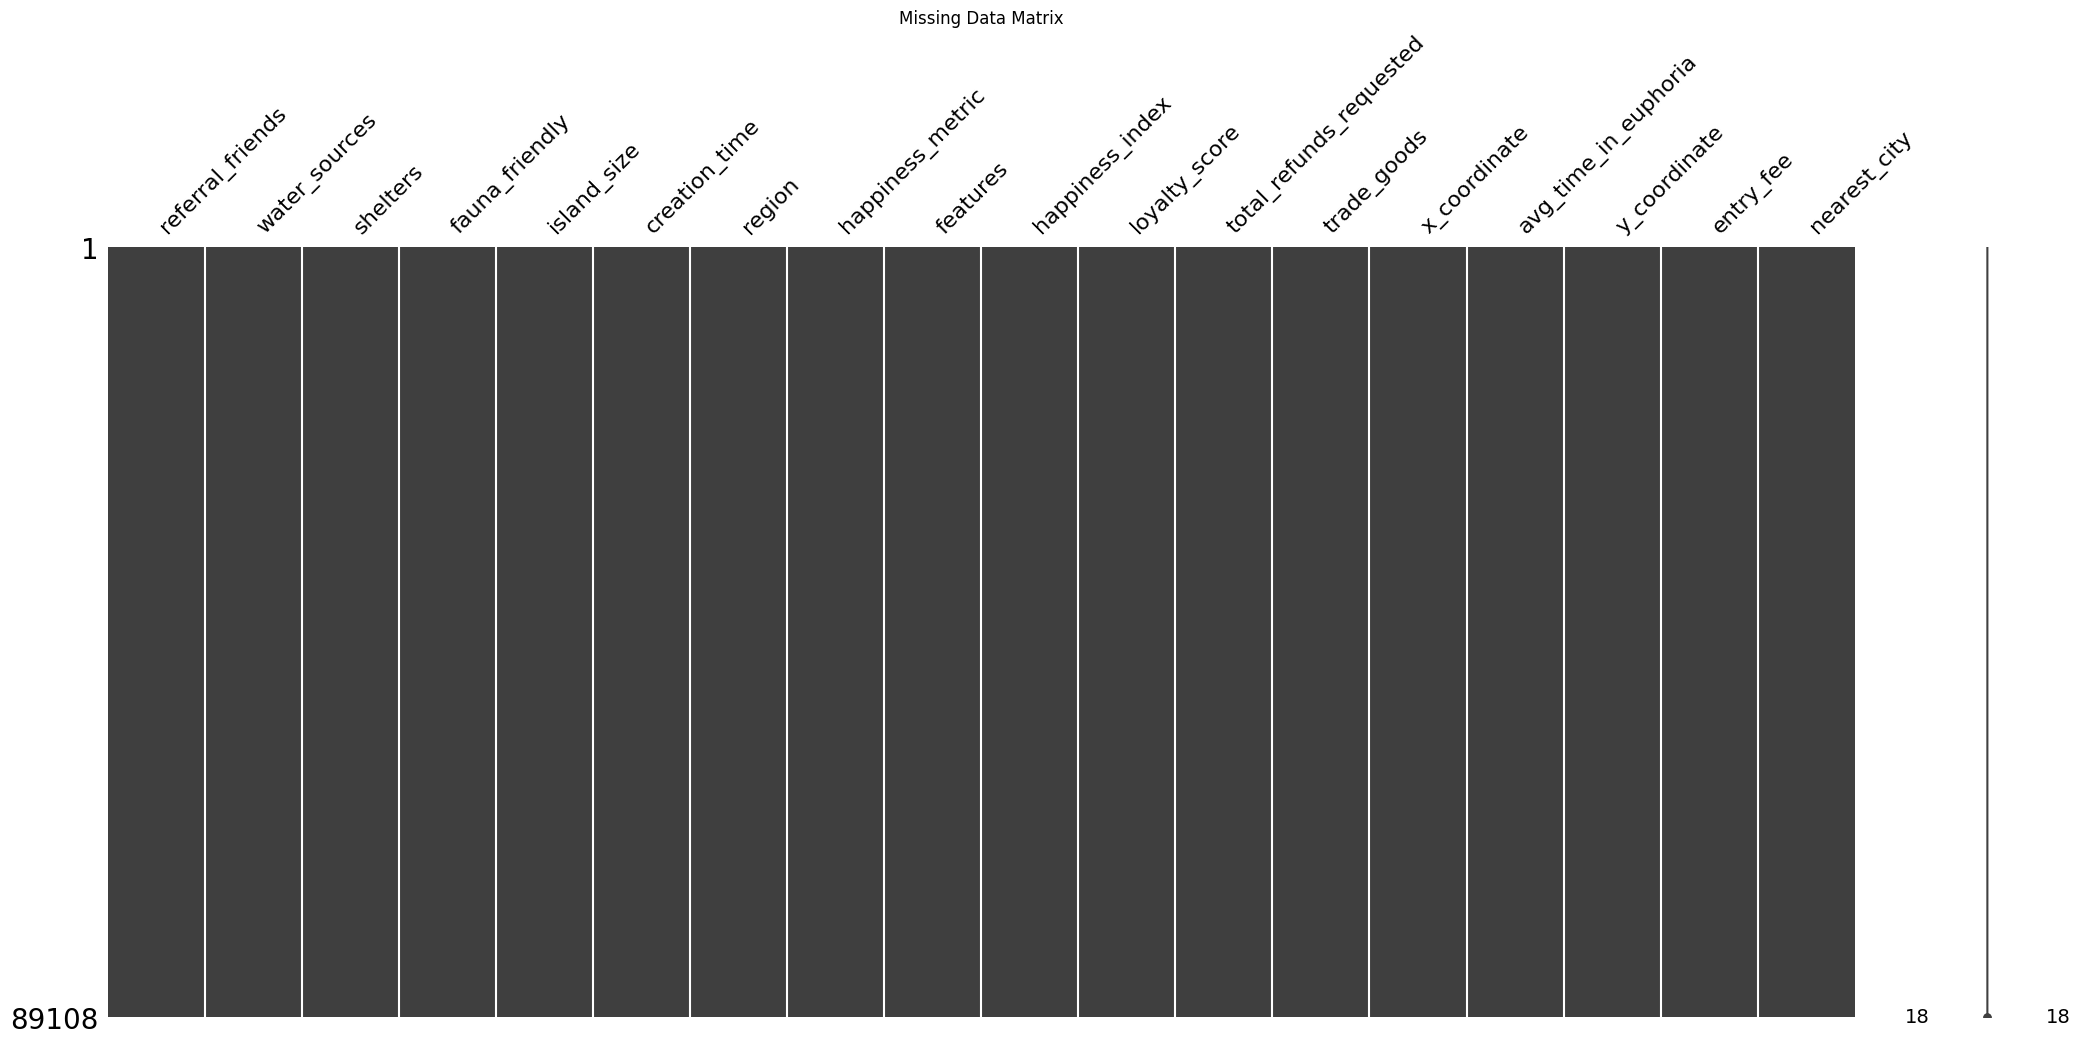

In [103]:
# Handle missing values for numeric columns by imputing with the median and mean
numeric_cols_with_missing = euphoria_data.select_dtypes(include=['number']).columns.tolist()

for col in numeric_cols_with_missing:
    # Fill missing values with the median for skewed columns
    if col == 'island_size':
        median_value = euphoria_data[col].median()
        euphoria_data[col] = euphoria_data[col].fillna(median_value)
    elif col in ['x_coordinate', 'y_coordinate']:
        euphoria_data[col] = euphoria_data[col].fillna(0)
    else:
        mean_value = euphoria_data[col].mean()
        euphoria_data[col] = euphoria_data[col].fillna(mean_value)

# Display the updated dataset
print("\nUpdated Dataset:")
print(euphoria_data.head(10))

# Missing data matrix
plt.figure(figsize=(12, 6))
msno.matrix(euphoria_data)
plt.title("Missing Data Matrix")
plt.show()

#### Numeric Values Distribution After Handling Missing Values

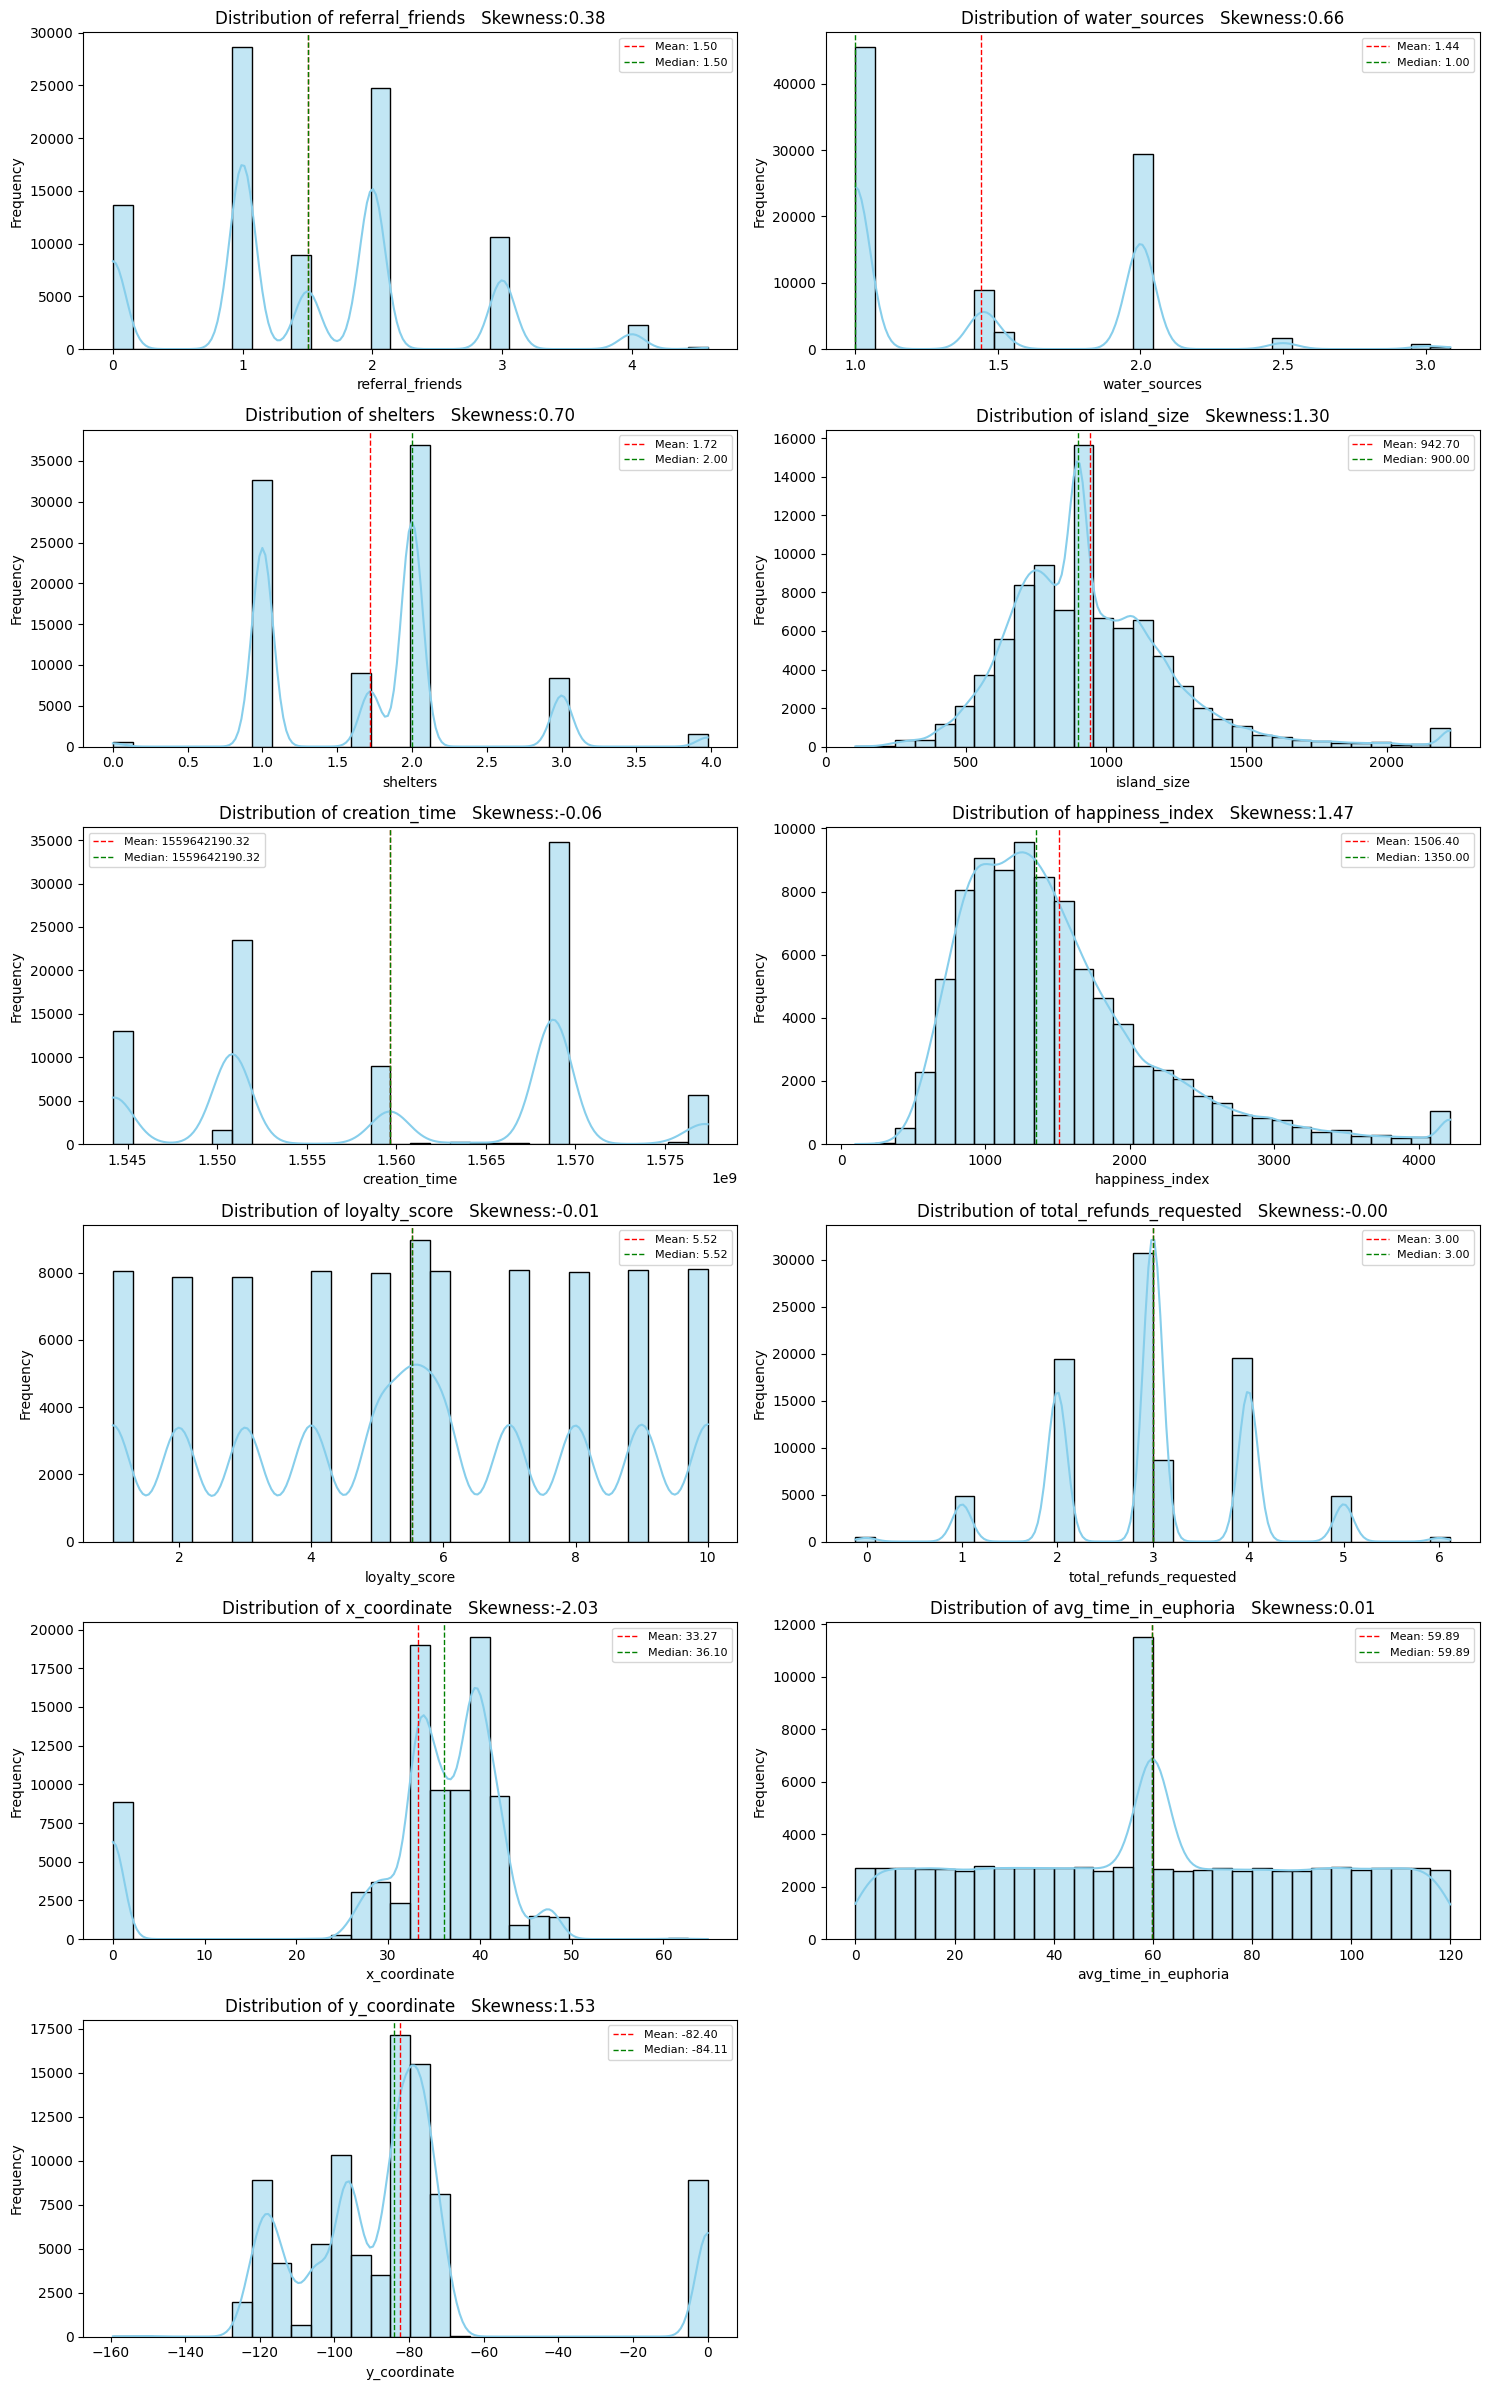

In [104]:
numeric_columns = euphoria_data.select_dtypes(include=['number']).columns.tolist()
plot_numeric_distributions(euphoria_data, numeric_columns)

### Comment on Missing Values Handling

The results after handling missing values indicate the following improvements:

1. **Region Imputation**:
   - Initially, 10,186 missing `region` values were reduced to 1,957 after geographic proximity-based imputation.
   - Further mapping using `nearest_city` reduced the missing count to 268.
   - Remaining rows with missing `region` values were dropped, resulting in a dataset with 99,224 rows.

2. **Row Removal**:
   - Rows with missing `happiness_index` and duplicate `island_id` values were removed, reducing the dataset to 89,108 rows.

3. **Final Dataset**:
   - All missing values were handled, and the `island_id` column was removed.
   - Categorical columns and numeric columns  were filled appropriately.
   - The dataset now has 18 columns and 89,108 rows with no missing data.

4. **Distributions**:
   - Numeric column distributions show improved consistency and reduced skewness.

## Selecting Features
This section prepares the dataset for analysis by:

1. **Categorical Correlation Analysis**: One-hot encodes categorical variables to analyze their correlation with `happiness_index` using heatmaps.

2. **Feature Engineering**: Processes the `features` column into individual amenities, applies one-hot encoding, and adds a new `num_features` column to count the number of amenities.

3. **Region-Based Analysis**: Groups regions into broader categories (e.g., `West`, `South`), analyzes their correlation with `happiness_index`.

4. **Dataset Cleaning**: Removes unnecessary columns (e.g., `trade_goods`, `entry_fee`, `x_coordinate`) to keep only relevant features.

5. **Scaling and Final Dataset**: Normalizes numeric columns using Min-Max Scaling and verifies the dataset's structure and summary statistics.

**Purpose:** The dataset is cleaned, enhanced with engineered features, and normalized for predictive modeling and analysis.

### Handling Categorical Columns

####  Removing **entry_fee**, **happiness_metric**, **trade_goods**, **fauna_friendly**, and **nearest_city** Columns

**Reasons:**
1. **No Significant Correlation**:
   - None of these columns show meaningful correlation with the target variable (`happiness_index`), as all correlation values are negligible.

2. **Extreme Imbalance**:
   - Each column is dominated by a single category, with minimal representation in other categories:
     - **`entry_fee`**: `No` (89.6%), `None` (10.2%), `Yes` (0.2%).
     - **`happiness_metric`**: `Monthly` (90%), `None` (10%), `Weekly` (0%).
     - **`trade_goods`**: `USD` (90%), `None` (10%).
     - **`fauna_friendly`**: `NaN` (64.7%), `Cats,Dogs` (33.6%), with other categories accounting for less than 2%.

3. **High Missing Values** (Specific to `fauna_friendly`):
   - The `fauna_friendly` column contains 64.7% missing values, making it unreliable and unsuitable for analysis.

4. **Low Predictive Utility**:
   - The lack of variability and negligible correlation in these columns indicates they are unlikely to contribute to predictive modeling or provide meaningful insights.


The columns `entry_fee`, `happiness_metric`, `trade_goods`, `fauna_friendly`, and `nearest_city` are removed to simplify the dataset, reduce noise, and focus on features that offer greater analytical or predictive value.

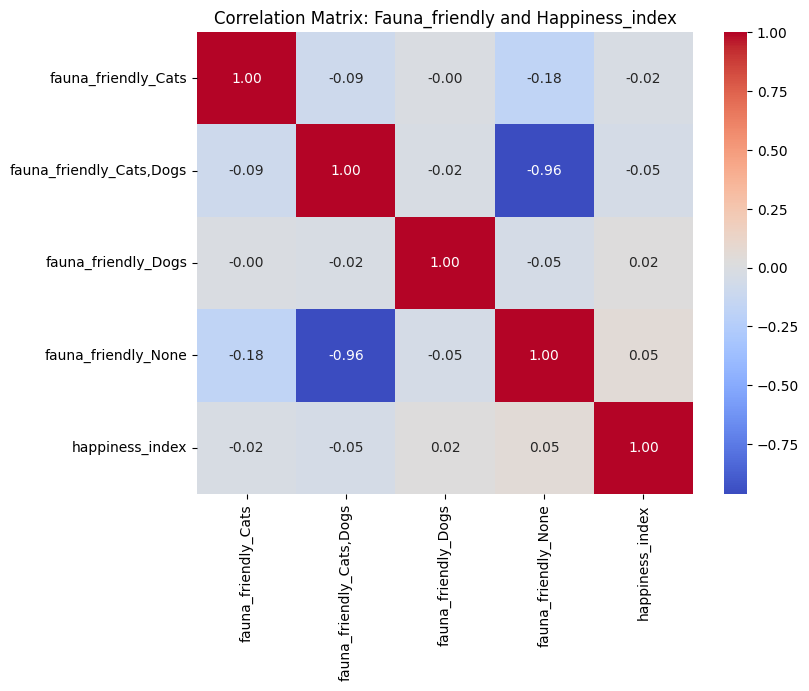

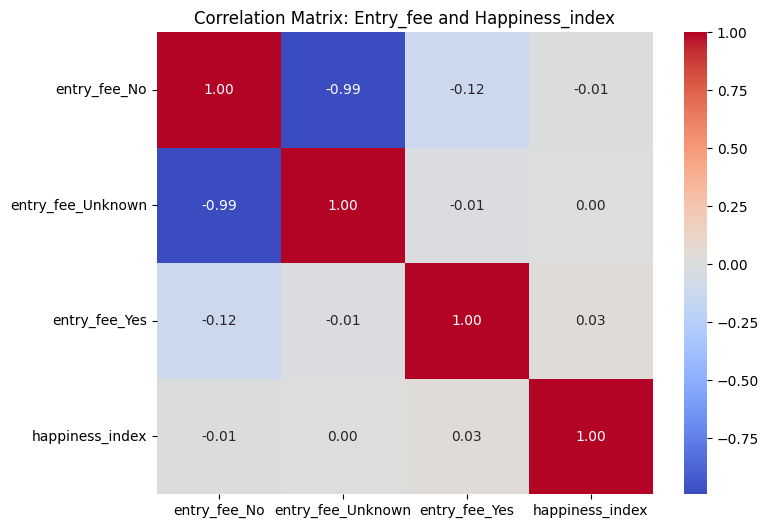

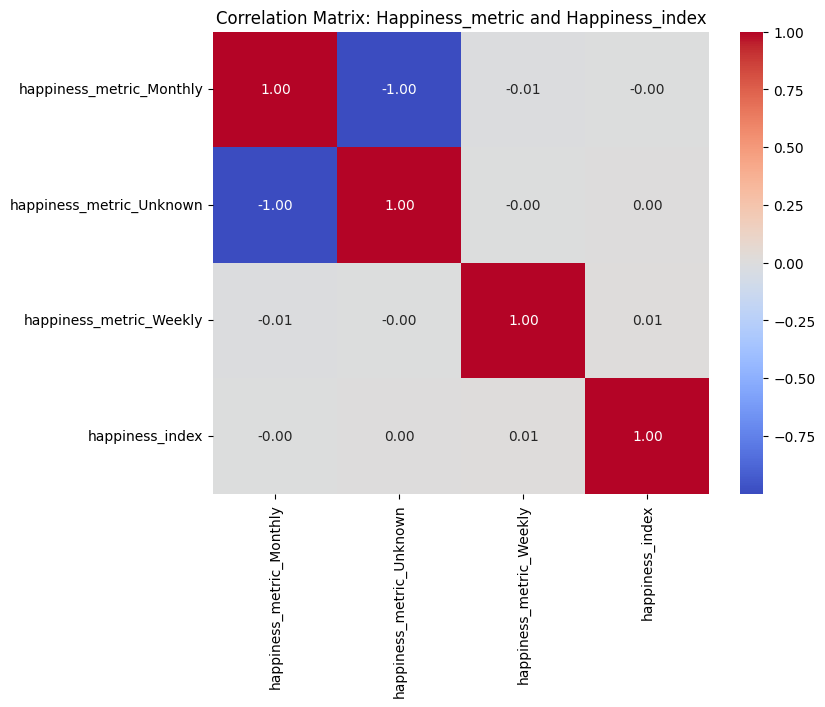

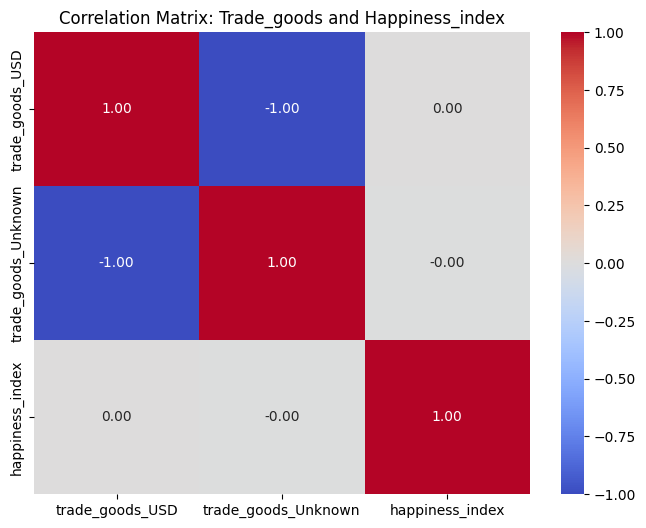

In [105]:
def analyze_categorical_correlation(data, categorical_columns, target_column):
    for col in categorical_columns:
        if col in data.columns:
            # Encode the categorical column, including 'None', as binary categories
            data = pd.get_dummies(data, columns=[col], drop_first=False)

            # Filter the correlation matrix to include only the categorical-related columns and target_column
            categorical_columns_encoded = [encoded_col for encoded_col in data.columns if f'{col}_' in encoded_col]
            selected_columns = categorical_columns_encoded + [target_column]

            # Calculate correlation matrix for selected columns
            correlation_matrix = data[selected_columns].corr()

            # Visualize the correlation matrix
            plt.figure(figsize=(8, 6))
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
            plt.title(f'Correlation Matrix: {col.capitalize()} and {target_column.capitalize()}')
            plt.show()

categorical_columns = ['fauna_friendly', 'entry_fee', 'happiness_metric', 'trade_goods']
analyze_categorical_correlation(euphoria_data, categorical_columns, 'happiness_index')

In [106]:
columns_to_remove = ['fauna_friendly', 'entry_fee', 'happiness_metric', 'trade_goods', 'nearest_city']

# Ensure the columns exist in the dataset before dropping
existing_columns_to_remove = [col for col in columns_to_remove if col in euphoria_data.columns]

if existing_columns_to_remove:
    euphoria_data.drop(columns=existing_columns_to_remove, inplace=True)
    print(f"Columns removed: {existing_columns_to_remove}")
    print(f"Updated dataset shape: {euphoria_data.shape}")
else:
    print("No columns to remove.")

Columns removed: ['fauna_friendly', 'entry_fee', 'happiness_metric', 'trade_goods', 'nearest_city']
Updated dataset shape: (89108, 13)


#### Analyzing `features` Column

##### Encoding `features` Column

In [107]:
# Ensure 'features' column is properly processed and ready for encoding
euphoria_data['features'] = euphoria_data['features'].fillna('None')
euphoria_data['features_split'] = euphoria_data['features'].str.split(',')

# Explode the features column into individual rows
euphoria_exploded = euphoria_data.explode('features_split').reset_index()  # Reset index to avoid duplicates

# Perform one-hot encoding on the 'features_split' column
encoded_features = pd.get_dummies(euphoria_exploded['features_split'], prefix='', prefix_sep='')

# Group by the original index to ensure aggregation after exploding
encoded_features_grouped = encoded_features.groupby(euphoria_exploded['index']).max()

# Combine the one-hot encoded features back with the original dataset
euphoria_features_encoded = pd.concat([euphoria_data.drop(columns=['features_split']), encoded_features_grouped], axis=1)

# Show a preview of the dataset
print(euphoria_features_encoded.head())

   referral_friends  water_sources  shelters  island_size  creation_time region                                                                                           features  happiness_index  loyalty_score  total_refunds_requested  ...  Patio/Deck  Playground   Pool  Refrigerator  Storage     TV  Tennis   View  Washer Dryer  Wood Floors
0               3.0       2.000000  2.000000        892.0   1.568754e+09     TX                                  AC,Clubhouse,Fireplace,Parking,Patio/Deck,Playground,Pool,Storage           1014.0            2.0                      1.0  ...        True        True   True         False     True  False   False  False         False        False
1               2.0       2.000000  3.000000       1322.0   1.553720e+09     PA                                                                                            Parking           2700.0            2.0                      3.0  ...       False       False  False         False    False  False   False  F

##### Analyzing Correlation with `happiness_index`

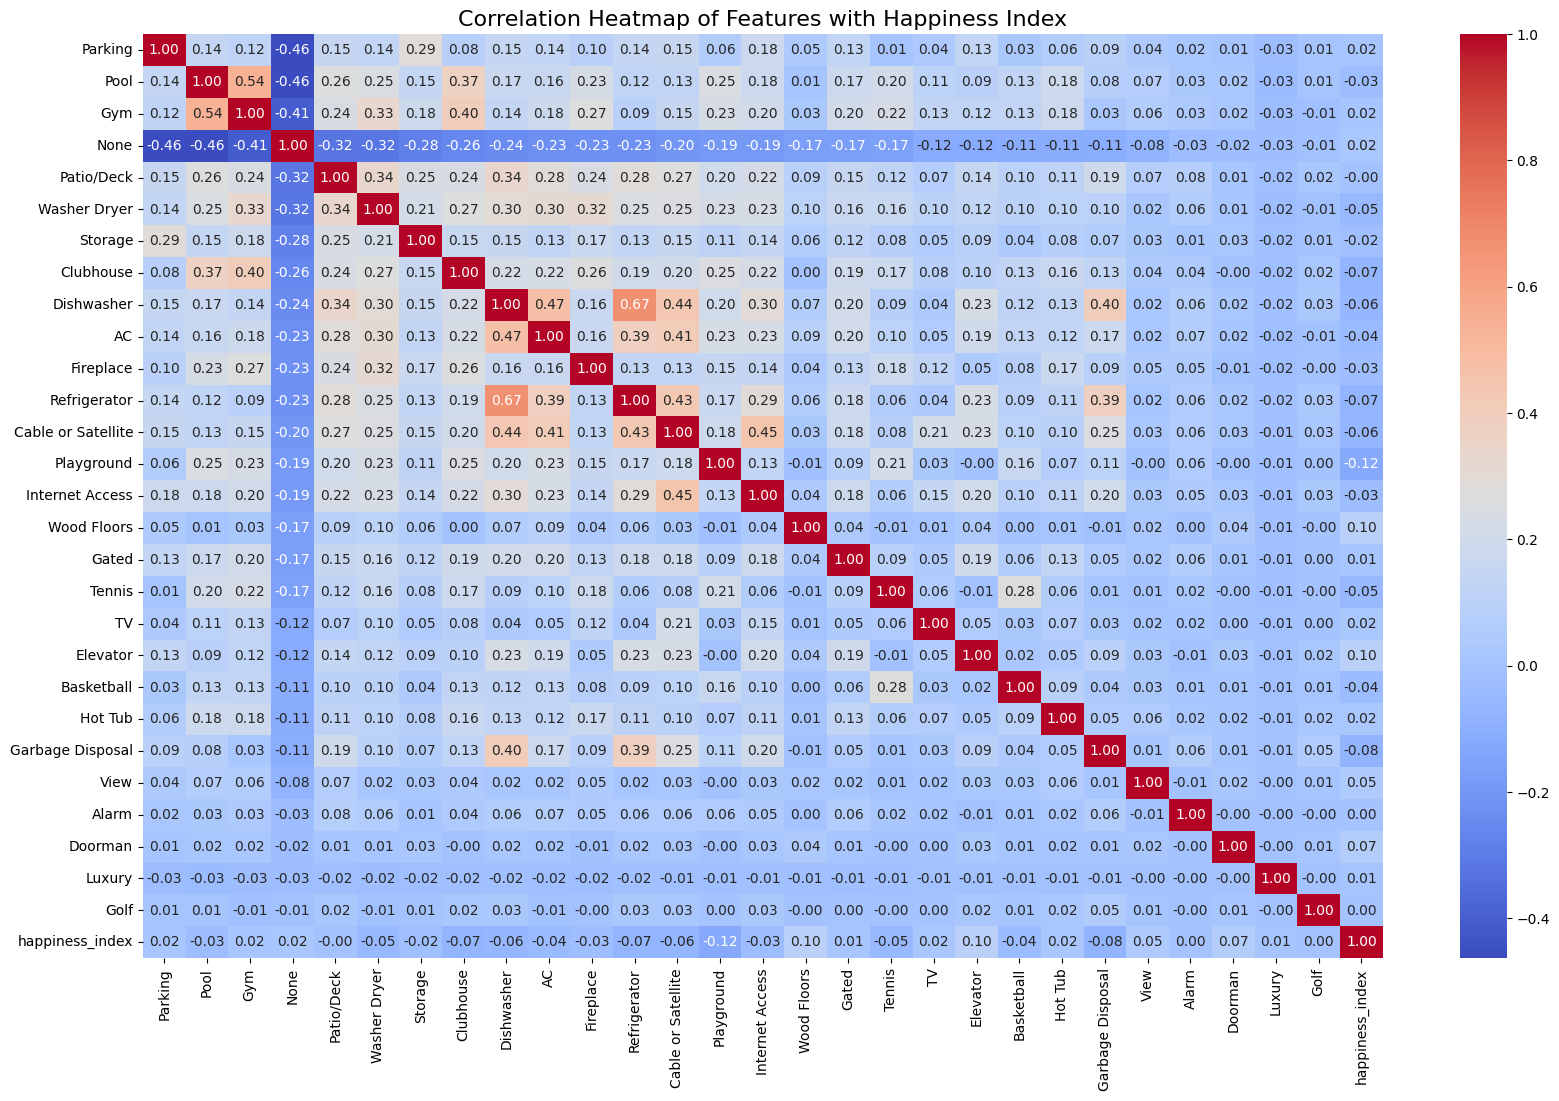

In [108]:
# Select the feature columns and happiness index for the heatmap
feature_columns = [
    'Parking', 'Pool', 'Gym', 'None', 'Patio/Deck', 'Washer Dryer', 'Storage', 'Clubhouse', 'Dishwasher',
    'AC', 'Fireplace', 'Refrigerator', 'Cable or Satellite', 'Playground', 'Internet Access', 'Wood Floors',
    'Gated', 'Tennis', 'TV', 'Elevator', 'Basketball', 'Hot Tub', 'Garbage Disposal', 'View', 'Alarm', 
    'Doorman', 'Luxury', 'Golf'
]

selected_features_happiness_data = euphoria_features_encoded[feature_columns + ['happiness_index']]

# Plot the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(
    selected_features_happiness_data.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True
)
plt.title('Correlation Heatmap of Features with Happiness Index', fontsize=16)
plt.show()

##### Analyzing features column based on the `number of features`

In [109]:
# Ensure the 'features' column is filled with empty strings for missing values
euphoria_data['features'] = euphoria_data['features'].fillna('')

# Create the 'num_features' column, excluding 'None' and empty values from the count
euphoria_data['num_features'] = euphoria_data['features'].apply(
    lambda x: len([feature for feature in x.split(',') if feature.strip().lower() not in ['none', '']])
)

# Display the first few rows to confirm the addition of 'num_features'
print(euphoria_data[['features', 'num_features']].head(10))

# Check basic statistics of the new column
print(euphoria_data['num_features'].describe())

                                                                                                        features  num_features
0                                              AC,Clubhouse,Fireplace,Parking,Patio/Deck,Playground,Pool,Storage             8
1                                                                                                        Parking             1
2              AC,Cable or Satellite,Clubhouse,Dishwasher,Fireplace,Gated,Gym,Parking,Patio/Deck,Refrigerator,TV            11
3                                                              AC,Dishwasher,Fireplace,Gated,Gym,Patio/Deck,Pool             7
4                                                                  AC,Gated,Internet Access,Parking,Pool,Storage             6
5                                                                                                           None             0
6                                                                                              Pool,Washer Drye

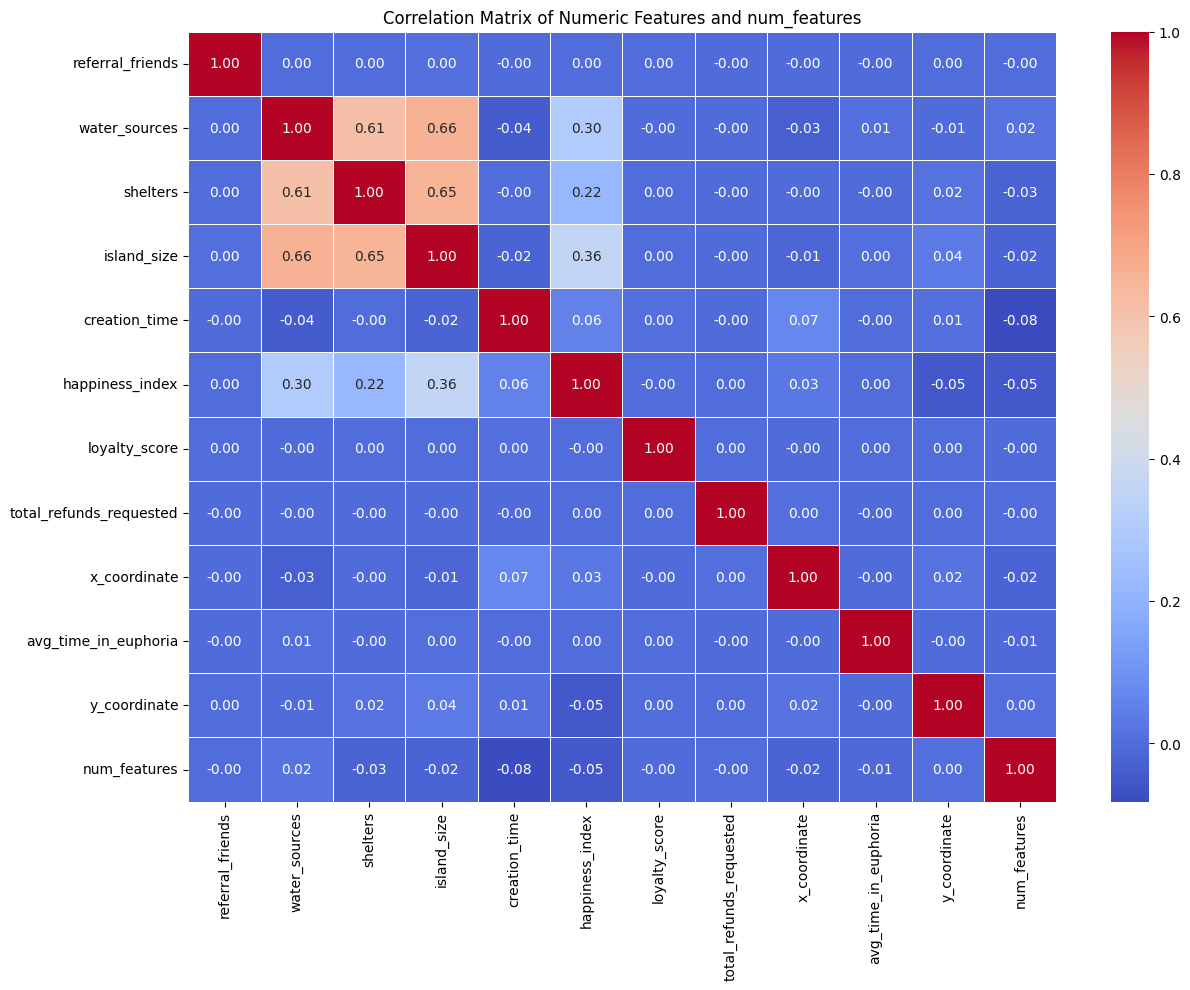

In [110]:
# Identify the numeric columns
columns_to_correlate = euphoria_data.select_dtypes(include=['number']).columns.tolist()
# Compute correlation matrix
correlation_matrix = euphoria_data[columns_to_correlate].corr()

# Plot the extended correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables and num_features')
plt.show()

##### Removing the **features** and **num_features** Column
 **Reasons for Removing `features`**:
1. **No Meaningful Correlation**:
   - The highest correlation between individual amenities and `happiness_index` is only 0.10, which is negligible for predictive purposes.
   - Most amenities have correlations close to zero or negative, indicating no significant relationship with the target variable.

2. **Simplification of the Dataset**: Removing this column reduces unnecessary complexity, streamlining the dataset for further analysis and modeling.

3. **Avoiding Noise**: Retaining columns with minimal relevance may introduce noise, negatively impacting model performance and interpretability.

4. **Resource Efficiency**: With a large dataset (~90,000 rows), eliminating low-value columns reduces computational overhead and enhances processing efficiency.

**Reasons for Removing `num_features`**:
1. **No Correlation with the Target**: The correlation between `num_features` and `happiness_index` is -0.05, which is negligible and indicates no predictive utility.

2. **Redundancy**: `num_features` is derived from the `features` column. Since individual amenities have no meaningful correlation with `happiness_index`, the aggregated count (`num_features`) adds no value.

3. **Dataset Optimization**: Removing derived columns that do not add significant insight or predictive power simplifies the dataset and avoids redundancy.


In [111]:
# Check and drop the 'features' and 'num_features' columns if they exist
columns_to_remove = ['features', 'features_split', 'num_features']

# Filter for columns that exist in the DataFrame
columns_to_drop = [col for col in columns_to_remove if col in euphoria_data.columns]

if columns_to_drop:
    euphoria_data.drop(columns=columns_to_drop, inplace=True)
    print(f"Removed columns: {columns_to_drop}")
    print(f"Updated dataset shape: {euphoria_data.shape}")
else:
    print("No specified columns found to remove.")


Removed columns: ['features', 'features_split', 'num_features']
Updated dataset shape: (89108, 12)


#### Analyzing `region` Column

##### Exploring Correlation with happiness_index

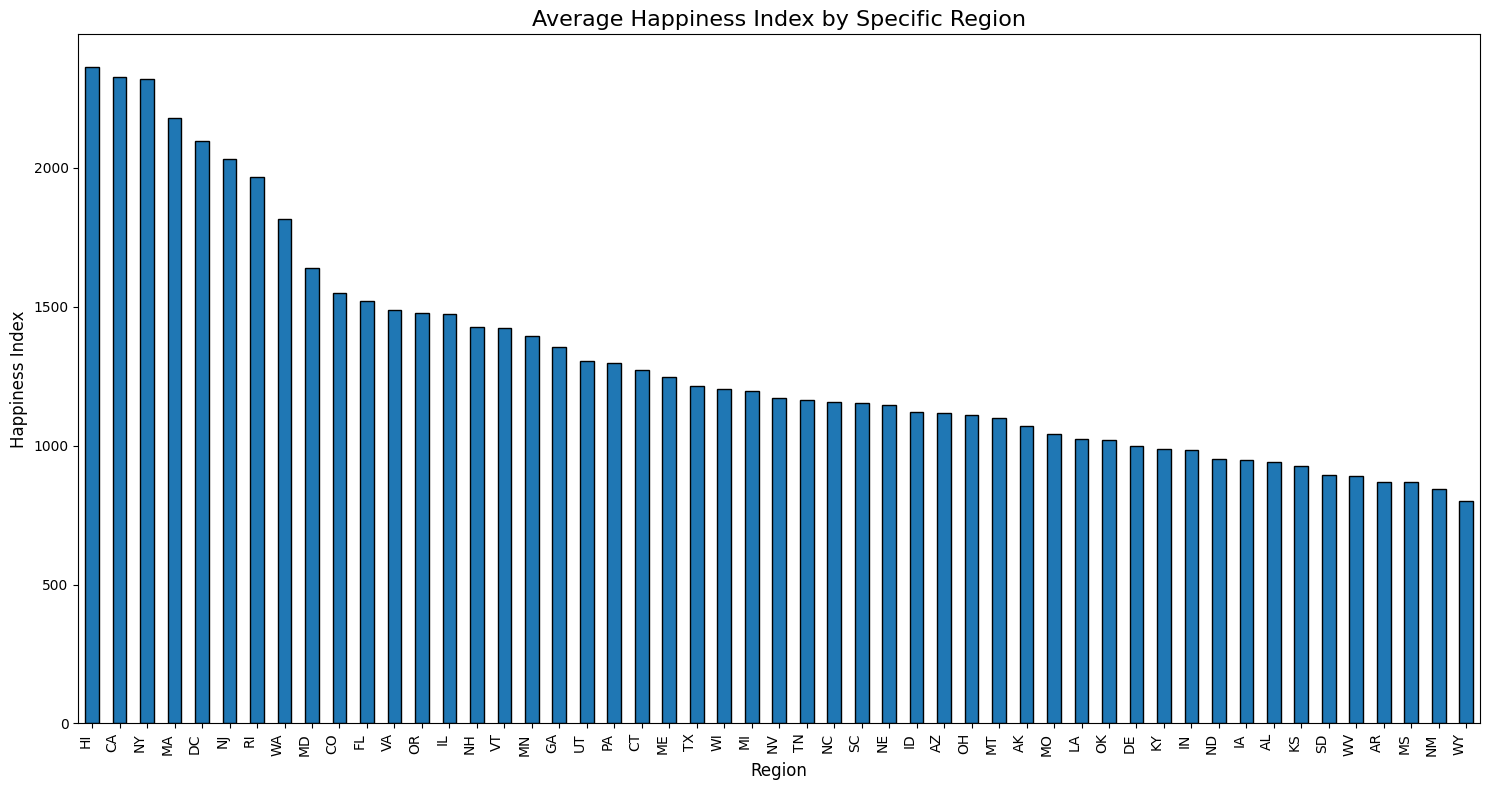

In [112]:
# Compute average happiness index for each specific region
region_happiness = (
    euphoria_data.groupby('region')['happiness_index']
    .mean()
    .sort_values(ascending=False)
)

# Plot average happiness index by specific region
plt.figure(figsize=(15, 8))
region_happiness.plot(kind='bar', edgecolor='black')
plt.title('Average Happiness Index by Specific Region', fontsize=16)
plt.ylabel('Happiness Index', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

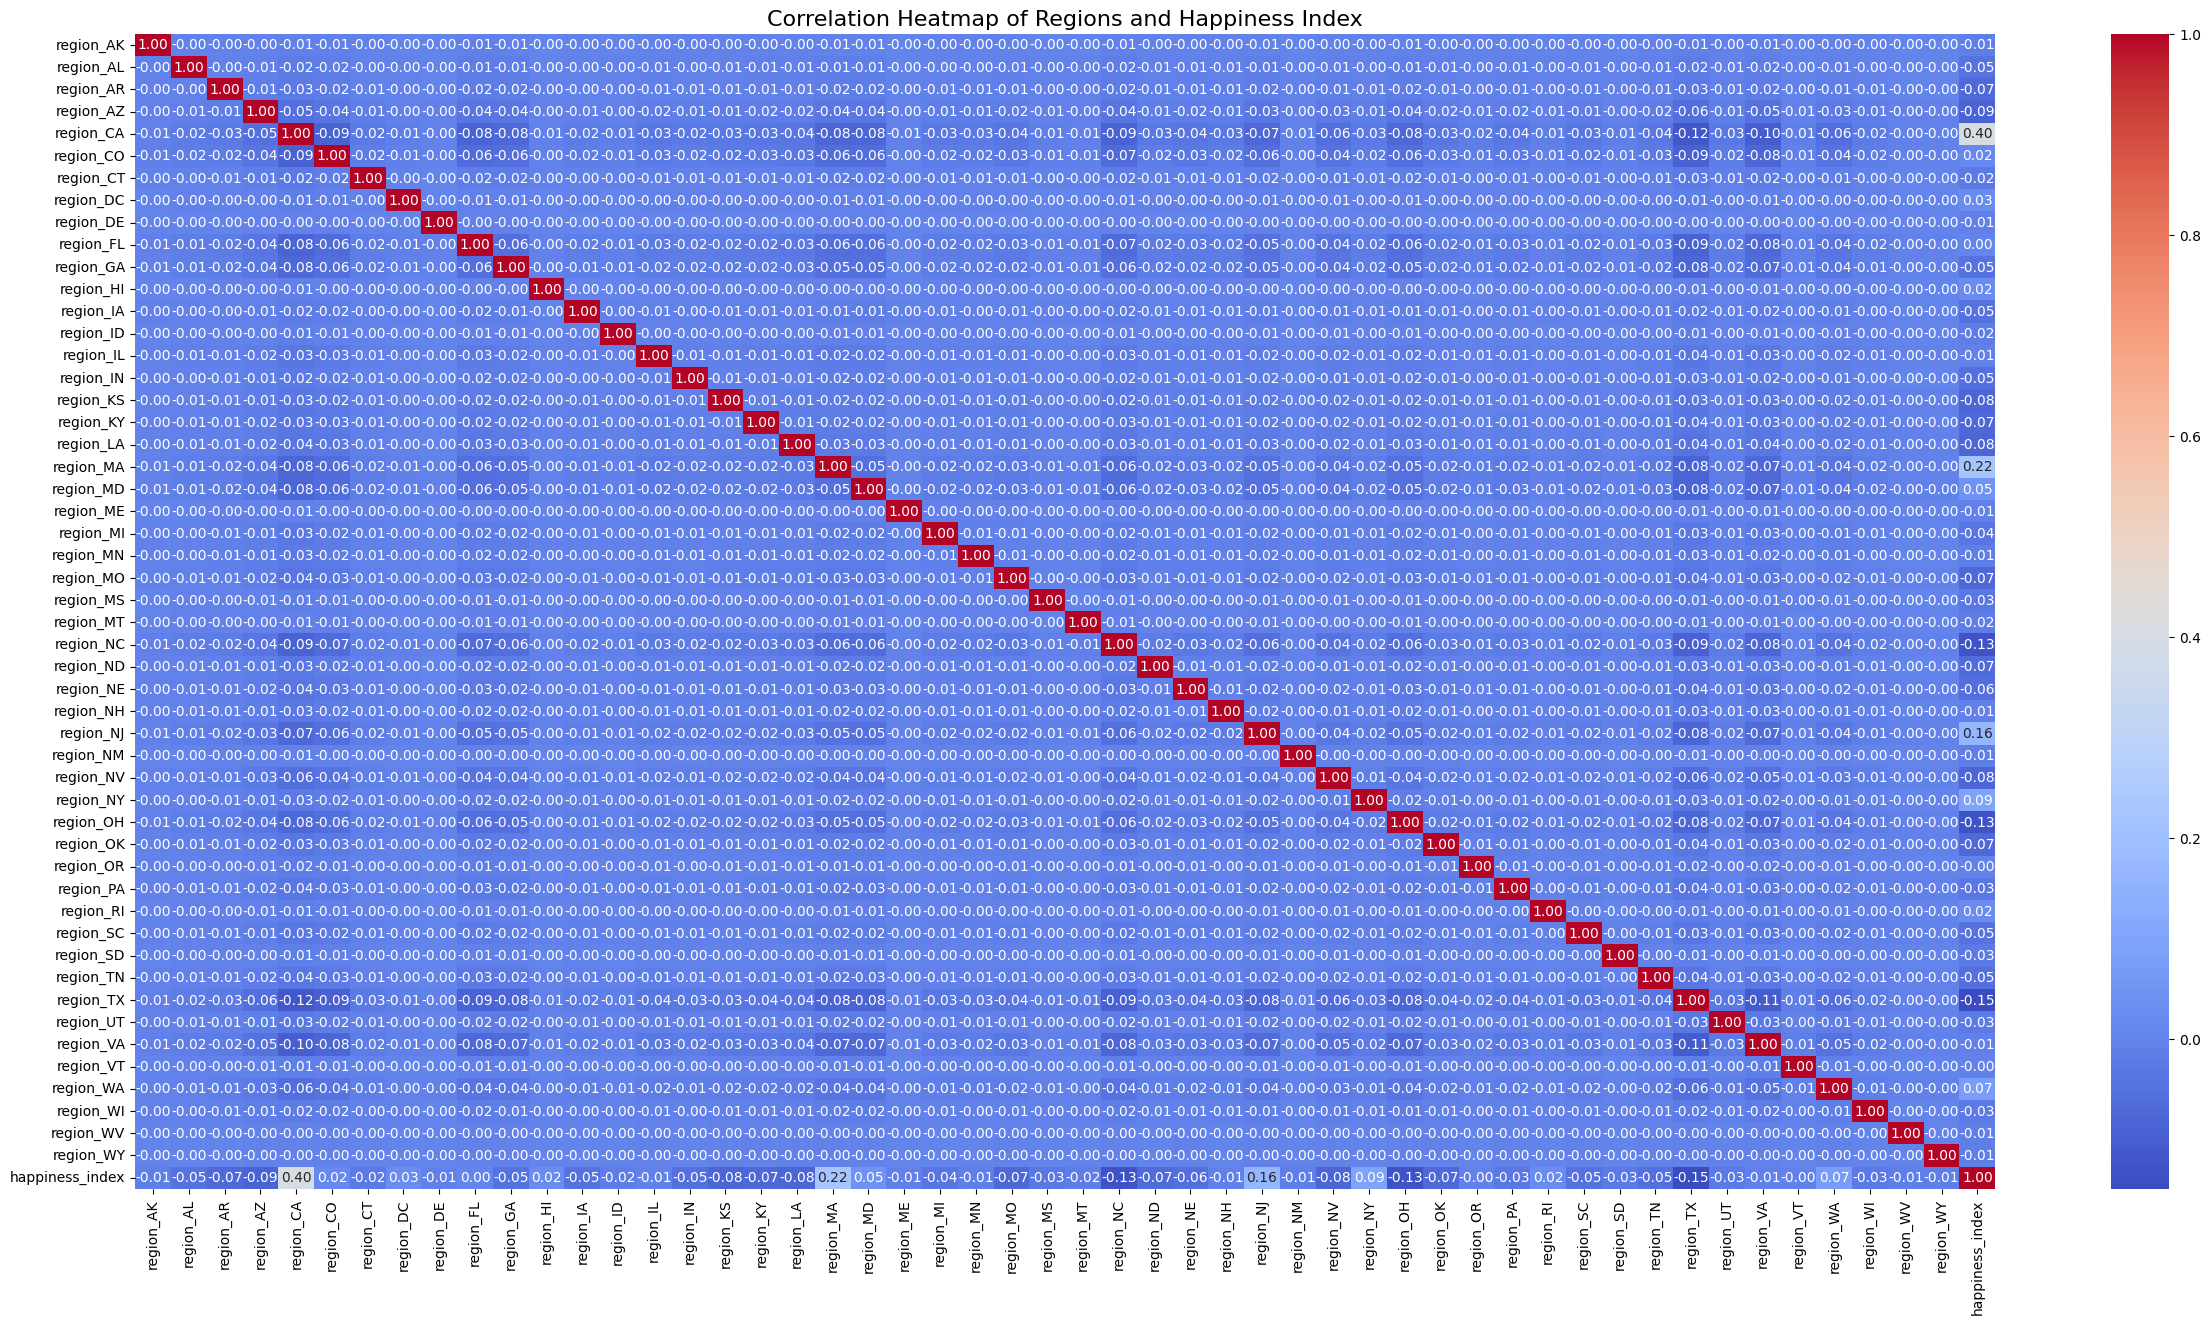

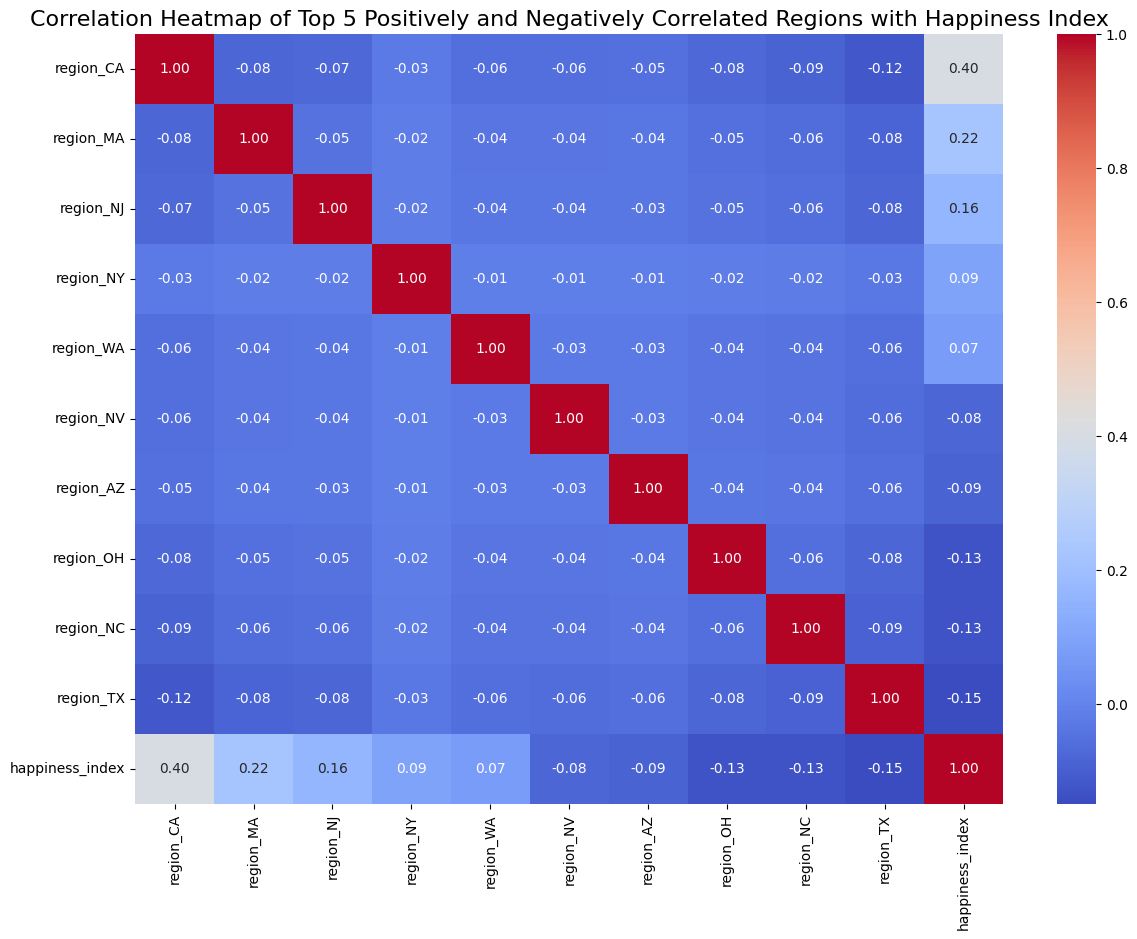

In [113]:
# Handle missing values in 'region' by imputing with 'Unknown' and one-hot encode it
region_encoded = pd.get_dummies(euphoria_data['region'], prefix='region')

# Concatenate one-hot encoded regions with 'happiness_index'
region_happiness_data = pd.concat([region_encoded, euphoria_data['happiness_index']], axis=1)

# Compute and plot the correlation matrix
plt.figure(figsize=(30, 15))
sns.heatmap(region_happiness_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap of Regions and Happiness Index', fontsize=16)
plt.show()

# Calculate correlations with 'happiness_index'
region_correlations = region_happiness_data.corr()['happiness_index'].sort_values(ascending=False)

# Exclude 'happiness_index' itself
region_correlations = region_correlations.drop('happiness_index')

# Select top 5 positively and negatively correlated regions
top_positive = region_correlations.head(5)
top_negative = region_correlations.tail(5)

# Combine the top correlated regions
selected_regions = pd.concat([top_positive, top_negative])

# Plot the heatmap for the top 5 positively and negatively correlated regions
selected_region_happiness_data = region_happiness_data[selected_regions.index.tolist() + ['happiness_index']]
plt.figure(figsize=(14, 10))
sns.heatmap(selected_region_happiness_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap of Top 5 Positively and Negatively Correlated Regions with Happiness Index', fontsize=16)
plt.show()

##### Encoding `region` Column in Groups

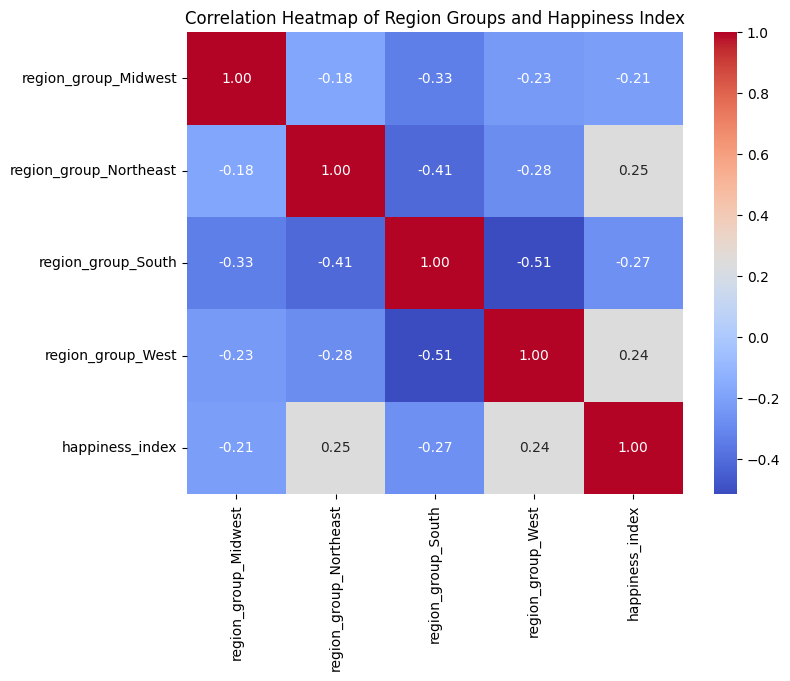

Region Group Encoding Summary:
region_group_South        38458
region_group_West         23053
region_group_Northeast    16307
region_group_Midwest      11290
dtype: int64


In [114]:
# Define region groupings
region_groups = {
    'West': ['CA', 'WA', 'OR', 'NV', 'UT', 'AK', 'HI', 'ID', 'MT', 'WY', 'CO', 'AZ', 'NM'],
    'Midwest': ['IL', 'OH', 'MI', 'MO', 'IA', 'ND', 'SD', 'NE', 'KS', 'MN', 'WI', 'IN'],
    'South': ['TX', 'FL', 'GA', 'SC', 'NC', 'VA', 'WV', 'TN', 'AL', 'KY', 'MS', 'AR', 'LA', 'OK'],
    'Northeast': ['NY', 'PA', 'MA', 'NJ', 'CT', 'RI', 'NH', 'VT', 'ME', 'DE', 'MD', 'DC']
}

# Map regions to broader categories
euphoria_data['region_group'] = euphoria_data['region'].map(
    lambda x: next((k for k, v in region_groups.items() if x in v), 'Unknown')
)

# One-hot encode grouped regions directly into `euphoria_data`
region_group_encoded = pd.get_dummies(euphoria_data['region_group'], prefix='region_group')
euphoria_data = pd.concat([euphoria_data, region_group_encoded], axis=1)

# Re-run correlation analysis with happiness_index
group_happiness_data = pd.concat([region_group_encoded, euphoria_data['happiness_index']], axis=1)

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(group_happiness_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Region Groups and Happiness Index')
plt.show()

# Filter only numeric columns related to 'region_group'
region_group_summary = euphoria_data.filter(like='region_group_').sum().sort_values(ascending=False)

# Print the region group encoding summary
print("Region Group Encoding Summary:")
print(region_group_summary)

##### Reasons for Grouping Regions

1. **Simplification of Regional Analysis**: The original dataset contains individual states or regions, resulting in a highly sparse dataset when one-hot encoded. Grouping regions into broader categories (e.g., West, Midwest, South, Northeast) reduces this sparsity and makes the data more manageable.

2. **Improved Correlation Analysis**: Broader regional categories allow for stronger and clearer correlations with the target variable (`happiness_index`). As seen in the heatmap, some region groups (e.g., Northeast and West) have stronger correlations than individual states, enhancing interpretability.

3. **Geographic Similarities**: States within a region group share geographic, economic, and cultural similarities that may collectively influence `happiness_index`. Grouping captures these shared characteristics more effectively than analyzing states individually.

4. **Reducing Dimensionality**: By grouping states into regions, the number of one-hot encoded columns is reduced, making the dataset more concise and reducing computational overhead during analysis and modeling.

5. **Highlighting Regional Trends**: Grouping regions helps identify broader geographic trends that may not be visible at the state level. For example, the correlation heatmap shows significant differences in how regions like the Northeast and South relate to `happiness_index`.

##### Removing `region` Column After Encoding It into Groups

In [115]:
# Check and drop the 'region' and 'region_group' columns if they exist
columns_to_remove = ['region', 'region_group']

# Filter for columns that exist in the DataFrame
columns_to_drop = [col for col in columns_to_remove if col in euphoria_data.columns]

if columns_to_drop:
    euphoria_data.drop(columns=columns_to_drop, inplace=True)
    print(f"Removed columns: {columns_to_drop}")
    print(f"Updated dataset shape: {euphoria_data.shape}")
else:
    print("No specified columns found to remove.")

Removed columns: ['region', 'region_group']
Updated dataset shape: (89108, 15)


### Handling Numerical Columns

#### Correlation Matrix

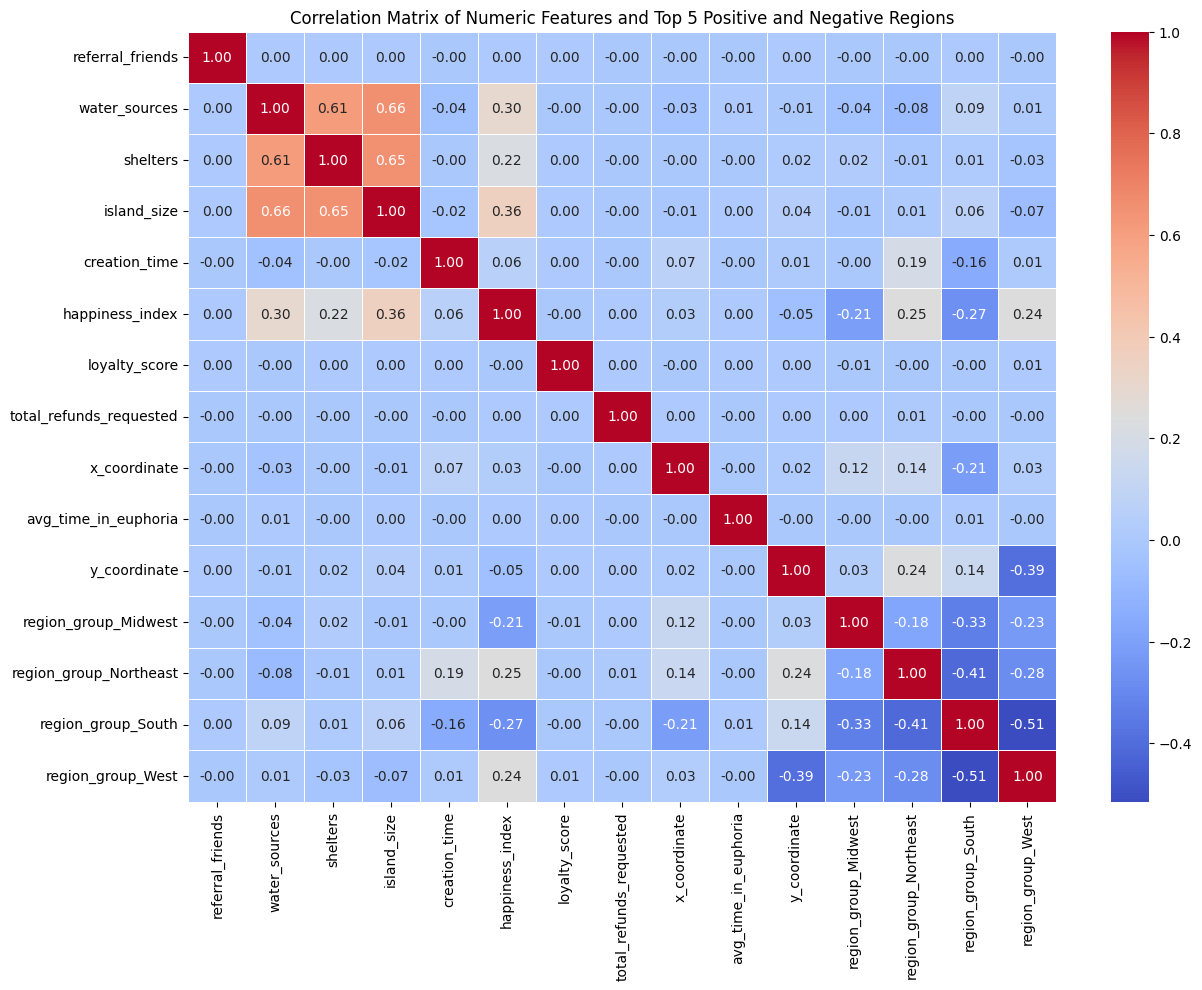

In [116]:
# Identify the numeric columns
columns_to_correlate = euphoria_data.columns.tolist()

# Compute correlation matrix
extended_correlation_matrix = euphoria_data[columns_to_correlate].corr()

# Plot the extended correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(extended_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features and Top 5 Positive and Negative Regions')
plt.show()

#### Removing Useless Columns

##### Explanation for Removing the Columns
**Columns:** `loyalty_score`, `total_refunds_requested`, `avg_time_in_euphoria`, `water_sources`, `x_coordinate`, `y_coordinate`, `referral_friends`, and `creation_time`.

1. **Negligible Correlation with the Target Variable (`happiness_index`)**:
   - All these columns exhibit **negligible correlations** with the target variable, typically ranging between **0.00 and 0.06** or slightly negative values like **-0.11**.
   - Their minimal correlation indicates they provide no meaningful predictive power or insight regarding the `happiness_index`.

2. **Minimal Interaction with Other Features**:
   - These columns also have **near-zero correlations** with other features in the dataset, demonstrating that they do not significantly contribute to the relationships or patterns within the data.

3. **Low Predictive Utility**:
   - Since they neither relate to the target variable nor interact meaningfully with other features, these columns are unlikely to improve the performance or interpretability of predictive models.

4. **High Dimensionality Reduction**:
   - By removing these uninformative columns, the dataset becomes simpler and more efficient to analyze and model.
   - Reducing the dimensionality eliminates unnecessary noise, potentially leading to better model performance and faster computation times.

**Purpose:** Removing these columns streamlines the dataset, ensures a focus on features with higher predictive value, and reduces computational complexity and potential noise during analysis and modeling.

In [117]:
columns_to_remove = [
    'loyalty_score', 'total_refunds_requested', 'avg_time_in_euphoria', 'water_sources',
    'x_coordinate', 'y_coordinate', 'referral_friends', 'creation_time'
]

euphoria_data = euphoria_data.drop(columns=columns_to_remove)
print(f"Updated dataset shape: {euphoria_data.shape}")

Updated dataset shape: (89108, 7)


### Normalization

We use **MinMaxScaler** because:

1. **KMeans Requires Equal Feature Contribution**: MinMaxScaler ensures all features are on the same scale (e.g., `[0, 1]`), so no single feature (like `island_size`) dominates the distance calculations.

2. **Handles Different Feature Ranges**: It works well with features that have vastly different ranges, such as large numeric values (`island_size`) and binary values (one-hot encoded regions).

3. **No Assumption About Distribution**: MinMaxScaler is suitable for features with non-Gaussian distributions, such as uniform or binary data.

4. **Improves Interpretability**: Scaled data remains intuitive, with values between 0 (minimum) and 1 (maximum), making it easier to analyze.

5. **Better Fit for Distance-Based Algorithms**: It’s ideal for KMeans and similar clustering methods, which are sensitive to the scale of features.

In [118]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = euphoria_data.select_dtypes(include=['number']).columns.tolist()

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling to numeric columns
euphoria_data[numeric_columns] = scaler.fit_transform(euphoria_data[numeric_columns])

# Check results
print(euphoria_data[numeric_columns].describe())

           shelters   island_size  happiness_index
count  89108.000000  89108.000000     89108.000000
mean       0.432766      0.394428         0.341504
std        0.174271      0.141818         0.169863
min        0.000000      0.000000         0.000000
25%        0.251479      0.302645         0.222181
50%        0.502957      0.374300         0.303526
75%        0.502957      0.467167         0.411582
max        1.000000      1.000000         1.000000


### Final Dataset

In [119]:
print("Final Dataset:")
print(euphoria_data.head(10))

print("\nFinal Dataset Shape:")
print(euphoria_data.shape)

print("\nFinal Dataset Info:")
print(euphoria_data.info())

print("\nFinal Dataset Description:")
print(euphoria_data.describe(include='all'))

Final Dataset:
    shelters  island_size  happiness_index  region_group_Midwest  region_group_Northeast  region_group_South  region_group_West
0   0.502957     0.370528         0.221938                 False                   False                True              False
1   0.754436     0.573235         0.631335                 False                    True               False              False
2   0.432766     0.517608         0.238936                 False                   False               False               True
3   0.251479     0.213077         0.182116                 False                   False                True              False
4   0.432766     0.265875         0.339950                 False                   False               False               True
5   0.251479     0.326216         0.210040                 False                   False                True              False
6   0.502957     0.350729         0.181873                  True                   False 

## K-Means Clustering

### Elbow Method

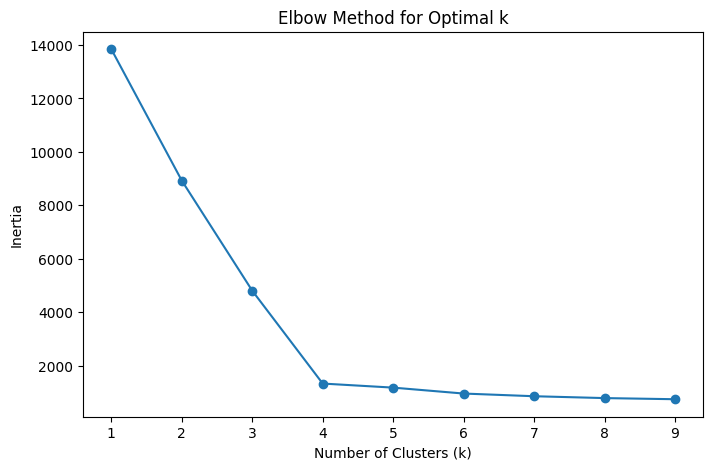

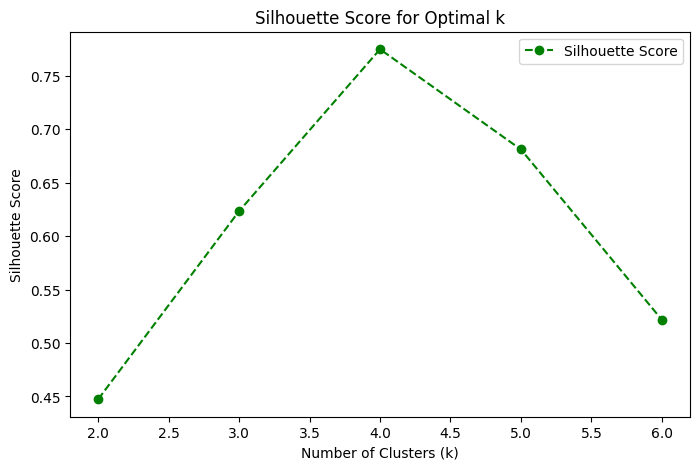

In [142]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

# Select the numeric columns for clustering
features = euphoria_data.columns.tolist()
X = euphoria_data[features]

# Downsample the dataset
downsample_train_frac = 0.20  # Use 20% of the data for training
X_train, X_validation = train_test_split(X, test_size=(1 - downsample_train_frac), random_state=42)

# Determine the optimal number of clusters using Elbow Method
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

silhouette_scores = []
k_range = range(2, 7)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='green', linestyle='--', label='Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

### Applying Clustering

kmeans_cluster
2    30767
1    18439
0    13033
3     9048
Name: count, dtype: int64


c:\Users\matte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


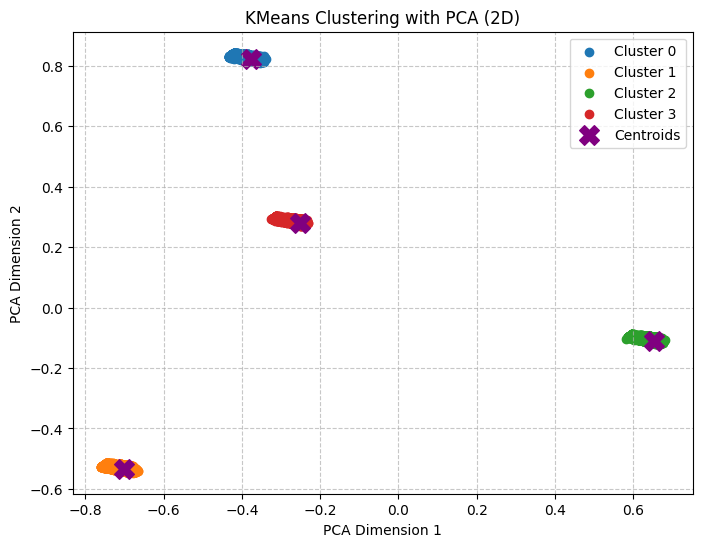

In [143]:
from sklearn.decomposition import PCA

# Apply K-Means with the chosen number of clusters
optimal_k = 4  # Chosen based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit(X_validation)

# Add cluster labels to the dataset
clustering_data_k_means = X_validation.copy()
clustering_data_k_means['kmeans_cluster'] = clusters.labels_

# Print cluster counts
print(clustering_data_k_means['kmeans_cluster'].value_counts())

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_validation)

# Plot the clusters in 2D
plt.figure(figsize=(8, 6))
for cluster in range(kmeans.n_clusters):
    cluster_data = X_pca[clustering_data_k_means['kmeans_cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

# Plot cluster centers in PCA-reduced space
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='purple', marker='X', label='Centroids')
plt.title('KMeans Clustering with PCA (2D)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


### Silhouette Score

In [144]:
from sklearn.metrics import silhouette_score

# Calculate actual silhouette_score for K-Means
silhouette_kmeans = silhouette_score(X_validation, clustering_data_k_means['kmeans_cluster'])
print(f'Silhouette Score: {silhouette_kmeans}')

Silhouette Score: 0.7755370761080935


### Cluster Summary

In [145]:
cluster_summary = clustering_data_k_means.groupby('kmeans_cluster')[features].mean()
print("Cluster Summary:")
print(cluster_summary.T)

Cluster Summary:
kmeans_cluster                 0         1         2         3
shelters                0.428973  0.424174  0.435251  0.444529
island_size             0.396605  0.377438  0.404024  0.391354
happiness_index         0.429916  0.411803  0.288560  0.249973
region_group_Midwest    0.000000  0.000000  0.000000  1.000000
region_group_Northeast  1.000000  0.000000  0.000000  0.000000
region_group_South      0.000000  0.000000  1.000000  0.000000
region_group_West       0.000000  1.000000  0.000000  0.000000


## DBSCAN

### Finding Best Hyperparamenter

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split

# Downsample the dataset
downsample_train_frac = 0.25  # Use 25% of the data for training
X_train, X_validation = train_test_split(X, test_size=(1 - downsample_train_frac), random_state=42)

# Hyperparameter tuning on the downsampled dataset
best_score = -1
best_params = None
results = []

eps_range = np.arange(0.09, 0.3, 0.03)  # Range of eps values
min_samples_range = range(3, 10)  # Range of min_samples values

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_train)
        
        # Exclude noise points (-1) for Silhouette Score calculation
        if len(set(labels)) > 1 and -1 in labels:
            score = silhouette_score(X_train[labels != -1], labels[labels != -1])
            results.append({'eps': eps, 'min_samples': min_samples, 'silhouette_score': score})
            
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

# Display the best parameters
print(f"Best Parameters: {best_params}")
print(f"Best Silhouette Score: {best_score}")

Best Parameters: {'eps': 0.27, 'min_samples': 7}
Best Silhouette Score: 0.7752863470510528


### Applying DBSCAN

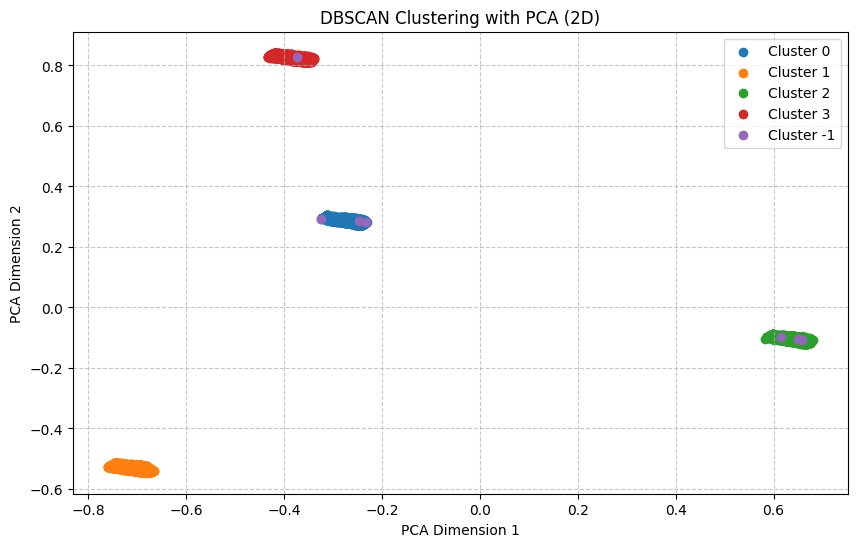

In [126]:
# Apply the best parameters to the full dataset
clustering_data_dbscan = X_validation.copy()
dbscan_full = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
full_labels = dbscan_full.fit_predict(X_validation)

# Add cluster labels to the full dataset
clustering_data_dbscan['dbscan_cluster'] = full_labels

# Visualize the results using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_validation)

plt.figure(figsize=(10, 6))
for cluster_label in set(full_labels):
    cluster_data = X_pca[full_labels == cluster_label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label}')
plt.title('DBSCAN Clustering with PCA (2D)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Silhouette Score

In [ ]:
# Calculate actual silhouette_score for DBSCAN
silhouette_dbscan = silhouette_score(X_validation, clustering_data_dbscan['dbscan_cluster'])
print(f'Silhouette Score: {silhouette_dbscan}')

Silhouette Score: 0.7581740396293785


### Cluster Summary

In [128]:
cluster_summary = clustering_data_dbscan.groupby('dbscan_cluster')[features].mean()
print("Cluster Summary:")
print(cluster_summary.T)

Cluster Summary:
dbscan_cluster                -1         0         1         2         3
shelters                0.107777  0.445225  0.424683  0.435408  0.429037
island_size             0.882943  0.391616  0.377790  0.404148  0.396726
happiness_index         0.471186  0.249831  0.411550  0.288914  0.430145
region_group_Midwest    0.428571  1.000000  0.000000  0.000000  0.000000
region_group_Northeast  0.142857  0.000000  0.000000  0.000000  1.000000
region_group_South      0.428571  0.000000  0.000000  1.000000  0.000000
region_group_West       0.000000  0.000000  1.000000  0.000000  0.000000


## Hierarchical Clustering

### Hyperparameter Tuning

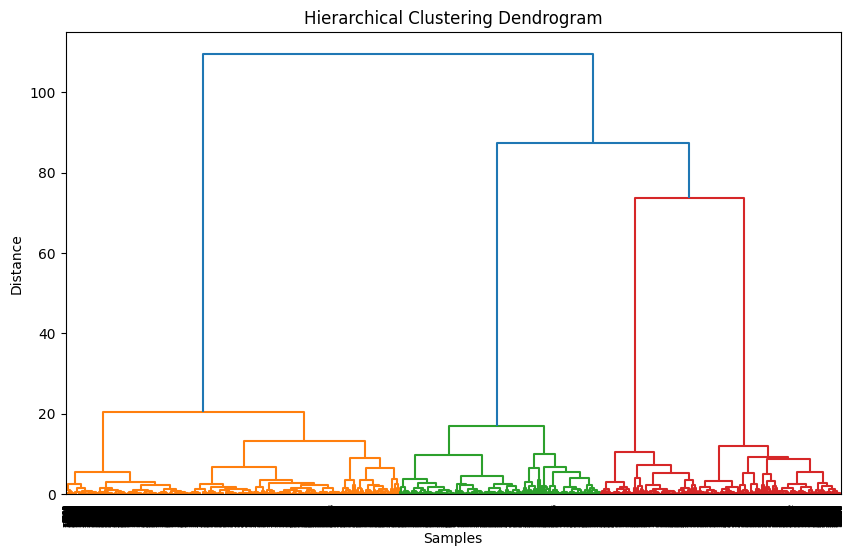

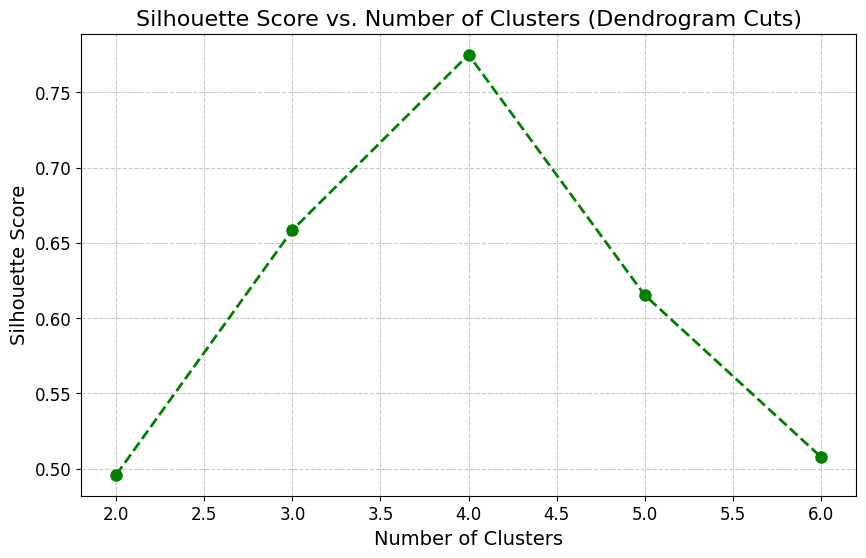

Best Number of Clusters: 4
Best Silhouette Score: 0.774932736496034


In [129]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split

# Downsample the dataset
downsample_train_frac = 0.20  # Use 20% of the data for training
X_train, X_validation = train_test_split(X, test_size=(1 - downsample_train_frac), random_state=42)

# Generate Dendrogram
plt.figure(figsize=(10, 6))
linked = linkage(X_train, method='ward')  # 'ward' minimizes variance in clusters
dendrogram(linked, truncate_mode='level')  # Adjust `p` to show fewer cluster levels
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Evaluate with Silhouette Score and choose the number of clusters
best_score = -1
best_n_clusters = None
results = []

for n_clusters in range(2, 7):  # Try different numbers of clusters
    hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    labels = hc.fit_predict(X_train)
    score = silhouette_score(X_train, labels)
    results.append({'n_clusters': n_clusters, 'silhouette_score': score})
    
    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters

# Plot Silhouette Scores
silhouette_scores = [result['silhouette_score'] for result in results]
cluster_range = range(2, 7)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', color='green', linestyle='--', linewidth=2, markersize=8)
plt.title('Silhouette Score vs. Number of Clusters (Dendrogram Cuts)', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Print the best number of clusters and Silhouette Score
print(f"Best Number of Clusters: {best_n_clusters}")
print(f"Best Silhouette Score: {best_score}")

### Applying Hierarchical Clustering

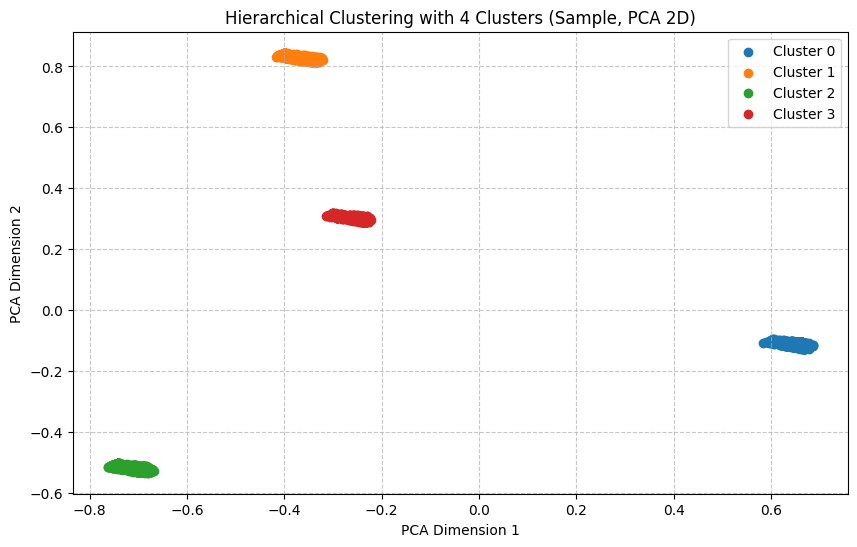

In [135]:
# Further downsample the validation dataset for memory usage issues
downsample_validation_frac = 0.3  # Use 30% of the validation data
X_validation_sampled = X_validation.sample(frac=downsample_validation_frac, random_state=42)

# Apply clustering to the sampled dataset
hc_sample = AgglomerativeClustering(n_clusters=best_n_clusters, metric='euclidean', linkage='ward')
sample_labels = hc_sample.fit_predict(X_validation_sampled)

# Add cluster labels to the sampled dataset
clustering_data_hc = X_validation_sampled.copy()
clustering_data_hc['hc_cluster'] = sample_labels

# Visualize Clustering with PCA
pca = PCA(n_components=2)
X_pca_sample = pca.fit_transform(X_validation_sampled)

plt.figure(figsize=(10, 6))
for cluster_label in set(sample_labels):
    cluster_data = X_pca_sample[sample_labels == cluster_label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label}')
plt.title(f'Hierarchical Clustering with {best_n_clusters} Clusters (Sample, PCA 2D)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Silhouette Score

In [137]:
# Calculate actual silhouette_score for Hierarchical Clustering
silhouette_hc = silhouette_score(X_validation_sampled, clustering_data_hc['hc_cluster'])
print(f'Silhouette Score: {silhouette_hc}')

Silhouette Score: 0.7745066185630914


### Cluster Summary

In [131]:
cluster_summary = clustering_data_hc.groupby('hc_cluster')[features].mean()
print("Cluster Summary:")
print(cluster_summary.T)

end_time = time.time()
execution_time = (end_time - start_time) / 60
print(f"Notebook execution time: {execution_time:.2f} minutes")

Cluster Summary:
hc_cluster                     0         1         2         3
shelters                0.438642  0.429162  0.423004  0.443196
island_size             0.406254  0.397410  0.379345  0.392208
happiness_index         0.288537  0.431013  0.411376  0.253173
region_group_Midwest    0.000000  0.000000  0.000000  1.000000
region_group_Northeast  0.000000  1.000000  0.000000  0.000000
region_group_South      1.000000  0.000000  0.000000  0.000000
region_group_West       0.000000  0.000000  1.000000  0.000000
Notebook execution time: 13.43 minutes


## Final Results